In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:75% !important; }</style>"))

In [69]:
import sys
import numpy as np
import pandas as pd

sys.path.append('/lfs/1/sahaana/enrichment/ember/utils')
from knn_utils import bm25_imdb_wiki_recall, compute_top_k_pd, bm25_SQuAD_sent_recall, bm25_imdb_fuzzy_recall, bm25_deepmatcher_recall, bm25_DM_blocked_recall, bm25_DM_joined_recall


%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
path = "/lfs/1/sahaana/enrichment/data/Okapi25Queries"
merged_col = "merged_all"

# SQuAD

## Sent

In [24]:
file = "dev_SQuAD_sent"

bm25 = pd.read_pickle(f"{path}/{file}_argsort_indices.pkl")

supervision = '/lfs/1/sahaana/enrichment/data/SQuAD/dev_sent_labels.pkl'
supervision = pd.read_pickle(supervision)
supervision

QID       SID
0     86821  [228945]
1     86822  [228945]
2     86823  [228947]
3     86824  [228947]
4     86825  [228951]
...     ...       ...
5923  92744  [244298]
5924  92745  [244298]
5925  92746  [244300]
5926  92747  [244304]
5927  92748  [244304]

[5928 rows x 2 columns]

In [32]:
compute_top_k_pd(bm25_SQuAD_sent_recall, (bm25, supervision), k_max=30)

k: 1 	 avg: 0.5334120823489706 	 count: 3161 	 MRR: 0.5334120823489706
k: 2 	 avg: 0.6029362132973338 	 count: 3573 	 MRR: 0.5681741478231522
k: 3 	 avg: 0.6339858251771853 	 count: 3757 	 MRR: 0.5785240184497693
k: 4 	 avg: 0.6557543030712116 	 count: 3886 	 MRR: 0.5839661379232759
k: 5 	 avg: 0.6714478569017888 	 count: 3979 	 MRR: 0.5871048486893914
k: 6 	 avg: 0.6819102261221734 	 count: 4041 	 MRR: 0.5888485768927888
k: 7 	 avg: 0.6928788390145123 	 count: 4106 	 MRR: 0.5904155215916943
k: 8 	 avg: 0.7021599730003375 	 count: 4161 	 MRR: 0.5915756633399225
k: 9 	 avg: 0.7085723928450894 	 count: 4199 	 MRR: 0.5922881544337839
k: 10 	 avg: 0.7153223084711441 	 count: 4239 	 MRR: 0.5929631459963892
k: 11 	 avg: 0.7219034762065474 	 count: 4278 	 MRR: 0.5935614339723351
k: 12 	 avg: 0.7294971312858589 	 count: 4323 	 MRR: 0.5941942385622777
k: 13 	 avg: 0.7345595680053999 	 count: 4353 	 MRR: 0.5945836567714732
k: 14 	 avg: 0.7408032399595005 	 count: 4390 	 MRR: 0.5950296333396232
k

k       avg  count       MRR  \
0    1  0.533412   3161  0.533412   
1    2  0.602936   3573  0.568174   
2    3  0.633986   3757  0.578524   
3    4  0.655754   3886  0.583966   
4    5  0.671448   3979  0.587105   
5    6  0.681910   4041  0.588849   
6    7  0.692879   4106  0.590416   
7    8  0.702160   4161  0.591576   
8    9  0.708572   4199  0.592288   
9   10  0.715322   4239  0.592963   
10  11  0.721903   4278  0.593561   
11  12  0.729497   4323  0.594194   
12  13  0.734560   4353  0.594584   
13  14  0.740803   4390  0.595030   
14  15  0.746203   4422  0.595390   
15  16  0.749916   4444  0.595622   
16  17  0.753291   4464  0.595820   
17  18  0.757172   4487  0.596036   
18  19  0.760547   4507  0.596213   
19  20  0.763753   4526  0.596374   
20  21  0.768815   4556  0.596615   
21  22  0.772190   4576  0.596768   
22  23  0.775397   4595  0.596908   
23  24  0.778265   4612  0.597027   
24  25  0.782484   4637  0.597196   
25  26  0.786365   4660  0.597345   
26  27  0.788728   4674  0.597433   
27  28  0.791259   4689  0.597523   
28  29  0.793621   4703  0.597605   
29  30  0.795815   4716  0.597678   

                                              results  \
0   [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...   
1   [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...   
2   [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, ...   
3   [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, ...   
4   [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, ...   
5   [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, ...   
6   [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, ...   
7   [0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, ...   
8   [0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, ...   
9   [0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, ...   
10  [0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, ...   
11  [0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, ...   
12  [0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, ...   
13  [0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, ...   
14  [0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, ...   
15  [0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, ...   
16  [0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, ...   
17  [0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, ...   
18  [0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, ...   
19  [0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, ...   
20  [0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, ...   
21  [0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, ...   
22  [0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, ...   
23  [0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, ...   
24  [0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, ...   
25  [0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, ...   
26  [0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, ...   
27  [0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, ...   
28  [0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, ...   
29  [0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, ...   

                                          MRR_results  
0   [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
1   [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
2   [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
3   [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
4   [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
5   [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
6   [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
7   [0.0, 1.0, 0.0, 0.0, 0.125, 0.0, 0.0, 0.125, 0...  
8   [0.0, 1.0, 0.0, 0.0, 0.125, 0.0, 0.0, 0.125, 0...  
9   [0.0, 1.0, 0.0, 0.0, 0.125, 0.0, 0.0, 0.125, 0...  
10  [0.0, 1.0, 0.0, 0.0, 0.125, 0.0, 0.0, 0.125, 0...  
11  [0.0, 1.0, 0.0, 0.0, 0.125, 0.0, 0.0, 0.125, 0...  
12  [0.0, 1.0, 0.0, 0.0, 0.125, 0.0, 0.0, 0.125, 0...  
13  [0.0, 1.0, 0.0, 0.0, 0.125, 0.0, 0.0, 0.125, 0...  
14  [0.0, 1.0, 0.0, 0.0, 0.125, 0.0, 0.0, 0.125, 0...  
15  [0.0, 1.0, 0.0, 0.0, 0.125, 0.0, 0.0, 0.125, 0...  
16  [0.0, 1.0, 0.0, 0.0, 0.125, 0.0, 0.0, 0.125, 0...  
17  [0.0, 1.0, 0.0, 0.0, 0.125, 0.0, 0.0, 0.125, 0...  
18  [0.0, 1.0, 0.0, 0.0, 

## Para

In [12]:
file = "dev_SQuAD_para"

bm25 = pd.read_pickle(f"{path}/{file}_argsort_indices.pkl")

supervision = '/lfs/1/sahaana/enrichment/data/SQuAD/dev_para_labels.pkl'
supervision = pd.read_pickle(supervision)
supervision

QID    PID
0     86821  19035
1     86822  19035
2     86823  19035
3     86824  19035
4     86825  19035
...     ...    ...
5923  92744  20238
5924  92745  20238
5925  92746  20238
5926  92747  20238
5927  92748  20238

[5928 rows x 2 columns]

In [14]:
for k in range(1,31):
    avg, count, MRR, results, MRR_results = bm25_SQuAD_recall(bm25, supervision, mode="PID", k=k)
    print(f"k: {k} \t avg: {avg} \t count: {count} \t MRR: {MRR}")

k: 1 	 avg: 0.6144110698616267 	 count: 3641 	 MRR: 0.6144110698616267
k: 2 	 avg: 0.7041849476881539 	 count: 4173 	 MRR: 0.6592980087748903
k: 3 	 avg: 0.744684441444482 	 count: 4413 	 MRR: 0.6727978400269997
k: 4 	 avg: 0.7649341883226459 	 count: 4533 	 MRR: 0.6778602767465407
k: 5 	 avg: 0.7824839689503881 	 count: 4637 	 MRR: 0.6813702328720891
k: 6 	 avg: 0.7966587917651029 	 count: 4721 	 MRR: 0.6837327033412082
k: 7 	 avg: 0.8052649341883227 	 count: 4772 	 MRR: 0.684962152258811
k: 8 	 avg: 0.8133648329395883 	 count: 4820 	 MRR: 0.6859746396027192
k: 9 	 avg: 0.8228147148160648 	 count: 4876 	 MRR: 0.6870246264778833
k: 10 	 avg: 0.8327708403644954 	 count: 4935 	 MRR: 0.6880202390327265
k: 11 	 avg: 0.8405332433344583 	 count: 4981 	 MRR: 0.6887259120299958
k: 12 	 avg: 0.845933175835302 	 count: 5013 	 MRR: 0.689175906405066
k: 13 	 avg: 0.8528518393520081 	 count: 5054 	 MRR: 0.6897081112909664
k: 14 	 avg: 0.8580830239622005 	 count: 5085 	 MRR: 0.6900817673345516
k: 15

# imdb_wiki

## Testing on the train data

In [12]:
file = "imdb_wiki"

bm25 = pd.read_pickle(f"{path}/{file}_argsort_indices.pkl")

supervision = f'/lfs/1/sahaana/enrichment/data/{file}/supervision_train.pkl'
supervision = pd.read_pickle(supervision)
supervision

IMDB_ID        QID
41098  tt2825120  Q14639047
28950  tt0403455   Q2120775
29297  tt0418460   Q3413700
30720  tt0477139   Q2002073
24124  tt0189630   Q3191800
...          ...        ...
23176  tt0154420    Q841958
47758  tt9358106  Q64768058
46228  tt6284256  Q77733171
32823  tt0997274   Q1037699
23808  tt0175996    Q590308

[38250 rows x 2 columns]

In [15]:
for k in range(1,31):
    avg, count, MRR, results, MRR_results = bm25_imdb_wiki_recall(bm25, supervision, k=k)
    print(f"k: {k} \t avg: {avg} \t count: {count} \t MRR: {MRR}")

k: 1 	 avg: 0.6769934640522876 	 count: 25895 	 MRR: 0.6769934640522876
k: 2 	 avg: 0.769281045751634 	 count: 29425 	 MRR: 0.7231372549019608
k: 3 	 avg: 0.8038169934640523 	 count: 30746 	 MRR: 0.7346492374727669
k: 4 	 avg: 0.825673202614379 	 count: 31582 	 MRR: 0.7401132897603484
k: 5 	 avg: 0.8414901960784313 	 count: 32187 	 MRR: 0.7432766884531592
k: 6 	 avg: 0.8542483660130719 	 count: 32675 	 MRR: 0.7454030501089325
k: 7 	 avg: 0.8634509803921568 	 count: 33027 	 MRR: 0.7467177093059446
k: 8 	 avg: 0.8709019607843137 	 count: 33312 	 MRR: 0.7476490818549643
k: 9 	 avg: 0.8782483660130719 	 count: 33593 	 MRR: 0.748465349102604
k: 10 	 avg: 0.8847581699346405 	 count: 33842 	 MRR: 0.7491163294947608
k: 11 	 avg: 0.8906928104575164 	 count: 34069 	 MRR: 0.7496558422695678
k: 12 	 avg: 0.8952941176470588 	 count: 34245 	 MRR: 0.750039284535363
k: 13 	 avg: 0.9003137254901961 	 count: 34437 	 MRR: 0.7504254082156044
k: 14 	 avg: 0.9046797385620915 	 count: 34604 	 MRR: 0.75073726

## dev data

In [36]:
file = "imdb_wiki"

bm25 = pd.read_pickle(f"{path}/dev_{file}_argsort_indices.pkl")

supervision = f'/lfs/1/sahaana/enrichment/data/{file}/supervision_test.pkl'
supervision = pd.read_pickle(supervision)
supervision

IMDB_ID        QID
4026   tt0038427    Q547323
36696  tt1613092   Q5652429
35072  tt1327820    Q992227
45272  tt5462602  Q24901880
6080   tt0047167   Q1091180
...          ...        ...
9398   tt0060865    Q323820
14428  tt0081111   Q6748794
29105  tt0410400   Q3549360
19690  tt0107611   Q2525108
18937  tt0103128   Q1198774

[9563 rows x 2 columns]

In [39]:
compute_top_k_pd(bm25_imdb_wiki_recall, (bm25, supervision), k_max=30)

k: 1 	 avg: 0.6325420893025201 	 count: 6049 	 MRR: 0.6325420893025201
k: 2 	 avg: 0.861863431977413 	 count: 8242 	 MRR: 0.7472027606399665
k: 3 	 avg: 0.8995085224301997 	 count: 8602 	 MRR: 0.7597511241242287
k: 4 	 avg: 0.918853916135104 	 count: 8787 	 MRR: 0.7645874725504548
k: 5 	 avg: 0.9310885705322598 	 count: 8904 	 MRR: 0.7670344034298859
k: 6 	 avg: 0.9406044128411586 	 count: 8995 	 MRR: 0.7686203771480358
k: 7 	 avg: 0.9499111157586532 	 count: 9084 	 MRR: 0.7699499061362493
k: 8 	 avg: 0.9558715884136777 	 count: 9141 	 MRR: 0.7706949652181273
k: 9 	 avg: 0.9605772247202761 	 count: 9186 	 MRR: 0.7712178136966383
k: 10 	 avg: 0.9624594792429154 	 count: 9204 	 MRR: 0.7714060391489024
k: 11 	 avg: 0.9647600125483635 	 count: 9226 	 MRR: 0.7716151785403066
k: 12 	 avg: 0.9668514064624072 	 count: 9246 	 MRR: 0.771789461366477
k: 13 	 avg: 0.9694656488549618 	 count: 9271 	 MRR: 0.7719905569351351
k: 14 	 avg: 0.9704067761162815 	 count: 9280 	 MRR: 0.7720577803109435
k: 1

k       avg  count       MRR  \
0    1  0.632542   6049  0.632542   
1    2  0.861863   8242  0.747203   
2    3  0.899509   8602  0.759751   
3    4  0.918854   8787  0.764587   
4    5  0.931089   8904  0.767034   
5    6  0.940604   8995  0.768620   
6    7  0.949911   9084  0.769950   
7    8  0.955872   9141  0.770695   
8    9  0.960577   9186  0.771218   
9   10  0.962459   9204  0.771406   
10  11  0.964760   9226  0.771615   
11  12  0.966851   9246  0.771789   
12  13  0.969466   9271  0.771991   
13  14  0.970407   9280  0.772058   
14  15  0.971975   9295  0.772162   
15  16  0.973126   9306  0.772234   
16  17  0.973648   9311  0.772265   
17  18  0.975008   9324  0.772341   
18  19  0.975844   9332  0.772385   
19  20  0.976786   9341  0.772432   
20  21  0.977622   9349  0.772471   
21  22  0.978040   9353  0.772490   
22  23  0.978145   9354  0.772495   
23  24  0.978877   9361  0.772526   
24  25  0.979086   9363  0.772534   
25  26  0.979400   9366  0.772546   
26  27  0.980132   9373  0.772573   
27  28  0.980759   9379  0.772595   
28  29  0.980968   9381  0.772603   
29  30  0.981177   9383  0.772610   

                                              results  \
0   [1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, ...   
1   [1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
2   [1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
3   [1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
4   [1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
5   [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
6   [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
7   [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
8   [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
9   [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
10  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
11  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
12  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
13  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
14  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
15  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
16  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
17  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
18  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
19  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
20  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
21  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
22  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
23  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
24  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
25  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
26  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
27  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
28  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
29  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   

                                          MRR_results  
0   [1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, ...  
1   [1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, ...  
2   [1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, ...  
3   [1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, ...  
4   [1.0, 0.0, 1.0, 1.0, 1.0, 0.2, 1.0, 1.0, 1.0, ...  
5   [1.0, 0.16666666666666666, 1.0, 1.0, 1.0, 0.2,...  
6   [1.0, 0.16666666666666666, 1.0, 1.0, 1.0, 0.2,...  
7   [1.0, 0.16666666666666666, 1.0, 1.0, 1.0, 0.2,...  
8   [1.0, 0.16666666666666666, 1.0, 1.0, 1.0, 0.2,...  
9   [1.0, 0.16666666666666666, 1.0, 1.0, 1.0, 0.2,...  
10  [1.0, 0.16666666666666666, 1.0, 1.0, 1.0, 0.2,...  
11  [1.0, 0.16666666666666666, 1.0, 1.0, 1.0, 0.2,...  
12  [1.0, 0.16666666666666666, 1.0, 1.0, 1.0, 0.2,...  
13  [1.0, 0.16666666666666666, 1.0, 1.0, 1.0, 0.2,...  
14  [1.0, 0.16666666666666666, 1.0, 1.0, 1.0, 0.2,...  
15  [1.0, 0.16666666666666666, 1.0, 1.0, 1.0, 0.2,...  
16  [1.0, 0.16666666666666666, 1.0, 1.0, 1.0, 0.2,...  
17  [1.0, 0.16666666666666666, 1.0, 1.0, 1.0, 0.2,...  
18  [1.0, 0.1666666666666

## HARD dev data

In [21]:
file = "imdb_wiki"

bm25 = pd.read_pickle(f"{path}/HARD_dev_{file}_argsort_indices.pkl")

supervision = f'/lfs/1/sahaana/enrichment/data/{file}/HARD_supervision_test.pkl'
supervision = pd.read_pickle(supervision)
supervision

IMDB_ID        QID
36059  tt1509767    Q309248
665    tt0019735    Q598245
1550   tt0025452    Q506625
44624  tt4940416  Q22674122
33944  tt1174693  Q11187871
...          ...        ...
2195   tt0029297   Q3824951
14823  tt0082905   Q3903060
32290  tt0896529   Q1025973
30498  tt0468521   Q4401668
20074  tt0109903   Q4156443

[9563 rows x 2 columns]

In [22]:
for k in range(1,31):
    avg, count, MRR, results, MRR_results = bm25_imdb_wiki_recall(bm25, supervision, k=k)
    print(f"k: {k} \t avg: {avg} \t count: {count} \t MRR: {MRR}")

k: 1 	 avg: 0.7342884032207466 	 count: 7022 	 MRR: 0.7342884032207466
k: 2 	 avg: 0.833734183833525 	 count: 7973 	 MRR: 0.7840112935271358
k: 3 	 avg: 0.8850779044232981 	 count: 8464 	 MRR: 0.8011258670570601
k: 4 	 avg: 0.9102792010875248 	 count: 8705 	 MRR: 0.8074261912231168
k: 5 	 avg: 0.922827564571787 	 count: 8825 	 MRR: 0.8099358639199694
k: 6 	 avg: 0.9307748614451532 	 count: 8901 	 MRR: 0.8112604133988637
k: 7 	 avg: 0.9396632855798389 	 count: 8986 	 MRR: 0.8125301882752474
k: 8 	 avg: 0.9456237582348636 	 count: 9043 	 MRR: 0.8132752473571254
k: 9 	 avg: 0.9517933702812925 	 count: 9102 	 MRR: 0.8139607598067286
k: 10 	 avg: 0.9568127156749974 	 count: 9150 	 MRR: 0.8144626943460991
k: 11 	 avg: 0.9607863641116804 	 count: 9188 	 MRR: 0.8148239351130703
k: 12 	 avg: 0.9646554428526612 	 count: 9225 	 MRR: 0.8151463583414854
k: 13 	 avg: 0.966746836766705 	 count: 9245 	 MRR: 0.8153072347964118
k: 14 	 avg: 0.9691519397678553 	 count: 9268 	 MRR: 0.8154790278679225
k: 1

# MS Marco

# Fuzzy Join (small)

In [12]:
file = "small_imdb_fuzzy"

bm25 = pd.read_pickle(f"{path}/dev_{file}_argsort_indices.pkl")

supervision = f'/lfs/1/sahaana/enrichment/data/{file}/supervision_test.pkl'
supervision = pd.read_pickle(supervision)
supervision

FUZZY_ID     tconst
40000    40000  tt1181484
40001    40001  tt1181484
40002    40002  tt1181484
40003    40003  tt1181484
40004    40004  tt1181484
...        ...        ...
49995    49995  tt2014359
49996    49996  tt2014359
49997    49997  tt2014359
49998    49998  tt2014359
49999    49999  tt2014359

[10000 rows x 2 columns]

In [13]:
for k in range(1,31):
    avg, count, MRR, results, MRR_results = bm25_imdb_fuzzy_recall(bm25, supervision, k=k)
    print(f"k: {k} \t avg: {avg} \t count: {count} \t MRR: {MRR}")

k: 1 	 avg: 0.8635 	 count: 8635 	 MRR: 0.8635
k: 2 	 avg: 0.8811 	 count: 8811 	 MRR: 0.8723
k: 3 	 avg: 0.889 	 count: 8890 	 MRR: 0.8749333333333333
k: 4 	 avg: 0.8937 	 count: 8937 	 MRR: 0.8761083333333334
k: 5 	 avg: 0.8988 	 count: 8988 	 MRR: 0.8771283333333333
k: 6 	 avg: 0.903 	 count: 9030 	 MRR: 0.8778283333333333
k: 7 	 avg: 0.9052 	 count: 9052 	 MRR: 0.8781426190476191
k: 8 	 avg: 0.9076 	 count: 9076 	 MRR: 0.8784426190476191
k: 9 	 avg: 0.9102 	 count: 9102 	 MRR: 0.878731507936508
k: 10 	 avg: 0.9127 	 count: 9127 	 MRR: 0.8789815079365079
k: 11 	 avg: 0.9142 	 count: 9142 	 MRR: 0.8791178715728716
k: 12 	 avg: 0.9158 	 count: 9158 	 MRR: 0.879251204906205
k: 13 	 avg: 0.9174 	 count: 9174 	 MRR: 0.8793742818292818
k: 14 	 avg: 0.9184 	 count: 9184 	 MRR: 0.8794457104007104
k: 15 	 avg: 0.9193 	 count: 9193 	 MRR: 0.8795057104007105
k: 16 	 avg: 0.9205 	 count: 9205 	 MRR: 0.8795807104007104
k: 17 	 avg: 0.9212 	 count: 9212 	 MRR: 0.8796218868712986
k: 18 	 avg: 0.92

# Fuzzy Join (hard)

In [16]:
file = "hard_imdb_fuzzy"

bm25 = pd.read_pickle(f"{path}/dev_{file}_argsort_indices.pkl")

supervision = f'/lfs/1/sahaana/enrichment/data/{file}/supervision_test.pkl'
supervision = pd.read_pickle(supervision)
supervision

FUZZY_ID     tconst
40000    40000  tt0196156
40001    40001  tt0196156
40002    40002  tt0196156
40003    40003  tt0196156
40004    40004  tt0196156
...        ...        ...
49995    49995  tt2084021
49996    49996  tt2084021
49997    49997  tt2084021
49998    49998  tt2084021
49999    49999  tt2084021

[10000 rows x 2 columns]

In [17]:
for k in range(1,31):
    avg, count, MRR, results, MRR_results = bm25_imdb_fuzzy_recall(bm25, supervision, k=k)
    print(f"k: {k} \t avg: {avg} \t count: {count} \t MRR: {MRR}")

k: 1 	 avg: 0.6444 	 count: 6444 	 MRR: 0.6444
k: 2 	 avg: 0.6818 	 count: 6818 	 MRR: 0.6631
k: 3 	 avg: 0.6993 	 count: 6993 	 MRR: 0.6689333333333333
k: 4 	 avg: 0.7106 	 count: 7106 	 MRR: 0.6717583333333333
k: 5 	 avg: 0.7186 	 count: 7186 	 MRR: 0.6733583333333334
k: 6 	 avg: 0.7251 	 count: 7251 	 MRR: 0.6744416666666667
k: 7 	 avg: 0.7303 	 count: 7303 	 MRR: 0.6751845238095239
k: 8 	 avg: 0.7352 	 count: 7352 	 MRR: 0.6757970238095239
k: 9 	 avg: 0.7379 	 count: 7379 	 MRR: 0.6760970238095239
k: 10 	 avg: 0.7412 	 count: 7412 	 MRR: 0.6764270238095238
k: 11 	 avg: 0.7438 	 count: 7438 	 MRR: 0.6766633874458874
k: 12 	 avg: 0.7463 	 count: 7463 	 MRR: 0.6768717207792208
k: 13 	 avg: 0.7485 	 count: 7485 	 MRR: 0.6770409515484516
k: 14 	 avg: 0.7512 	 count: 7512 	 MRR: 0.6772338086913087
k: 15 	 avg: 0.7529 	 count: 7529 	 MRR: 0.677347142024642
k: 16 	 avg: 0.7549 	 count: 7549 	 MRR: 0.677472142024642
k: 17 	 avg: 0.7563 	 count: 7563 	 MRR: 0.6775544949658185
k: 18 	 avg: 0.

# Fuzzy Join (very hard)

In [44]:
file = "very_hard_imdb_fuzzy"

bm25 = pd.read_pickle(f"{path}/dev_{file}_argsort_indices.pkl")

supervision = f'/lfs/1/sahaana/enrichment/data/{file}/supervision_test.pkl'
supervision = pd.read_pickle(supervision)
supervision

FUZZY_ID     tconst
40000    40000  tt0101399
40001    40001  tt0101399
40002    40002  tt0101399
40003    40003  tt0101399
40004    40004  tt0101399
...        ...        ...
49995    49995  tt0158184
49996    49996  tt0158184
49997    49997  tt0158184
49998    49998  tt0158184
49999    49999  tt0158184

[10000 rows x 2 columns]

In [45]:
for k in range(1,31):
    avg, count, MRR, results, MRR_results = bm25_imdb_fuzzy_recall(bm25, supervision, k=k)
    print(f"k: {k} \t avg: {avg} \t count: {count} \t MRR: {MRR}")

k: 1 	 avg: 0.8702 	 count: 8702 	 MRR: 0.8702
k: 2 	 avg: 0.8881 	 count: 8881 	 MRR: 0.87915
k: 3 	 avg: 0.8962 	 count: 8962 	 MRR: 0.88185
k: 4 	 avg: 0.9011 	 count: 9011 	 MRR: 0.883075
k: 5 	 avg: 0.9057 	 count: 9057 	 MRR: 0.8839949999999999
k: 6 	 avg: 0.9085 	 count: 9085 	 MRR: 0.8844616666666667
k: 7 	 avg: 0.911 	 count: 9110 	 MRR: 0.8848188095238096
k: 8 	 avg: 0.9126 	 count: 9126 	 MRR: 0.8850188095238096
k: 9 	 avg: 0.914 	 count: 9140 	 MRR: 0.8851743650793651
k: 10 	 avg: 0.9156 	 count: 9156 	 MRR: 0.8853343650793649
k: 11 	 avg: 0.9174 	 count: 9174 	 MRR: 0.8854980014430014
k: 12 	 avg: 0.9185 	 count: 9185 	 MRR: 0.8855896681096681
k: 13 	 avg: 0.9199 	 count: 9199 	 MRR: 0.8856973604173604
k: 14 	 avg: 0.9213 	 count: 9213 	 MRR: 0.8857973604173603
k: 15 	 avg: 0.9235 	 count: 9235 	 MRR: 0.8859440270840271
k: 16 	 avg: 0.9245 	 count: 9245 	 MRR: 0.886006527084027
k: 17 	 avg: 0.9258 	 count: 9258 	 MRR: 0.8860829976722624
k: 18 	 avg: 0.9266 	 count: 9266 	 

In [18]:
1

1

# Deepmatcher

In [38]:
datasets = {0:"abt_buy_exp_data", 
            1:"amazon_google_exp_data", 
            2:"beer_exp_data", 
            3:"company_exp_data", 
            4:"dblp_acm_exp_data", 
            5:"dblp_scholar_exp_data", 
            6:"dirty_dblp_acm_exp_data", 
            7:"dirty_dblp_scholar_exp_data", 
            8:"dirty_itunes_amazon_exp_data", 
            9:"dirty_walmart_amazon_exp_data", 
            10:"fodors_zagat_exp_data", 
            11:"itunes_amazon_exp_data", 
            12:"walmart_amazon_exp_data"}

In [43]:
for idx in datasets:
    file = datasets[idx]
    bm25 = pd.read_pickle(f"{path}/{file}_argsort_indices.pkl")
    supervision = f'/lfs/1/sahaana/enrichment/data/deepmatcher/{file}/supervision_test.pkl'
    supervision = pd.read_pickle(supervision)
    
    print(file)
    for k in range(1,15):
        avg, count, MRR, results, MRR_results = bm25_deepmatcher_recall(bm25, supervision, k=k)
        print(f"k: {k} \t avg: {avg} \t count: {count} \t MRR: {MRR}")
    print()
    print()


abt_buy_exp_data
k: 1 	 avg: 0.7580645161290323 	 count: 0.6844660194174758 	 MRR: 0.7193877551020408
k: 2 	 avg: 0.47352941176470587 	 count: 0.7815533980582524 	 MRR: 0.5897435897435896
k: 3 	 avg: 0.36796536796536794 	 count: 0.8252427184466019 	 MRR: 0.5089820359281437
k: 4 	 avg: 0.3076923076923077 	 count: 0.8543689320388349 	 MRR: 0.4524421593830335
k: 5 	 avg: 0.26548672566371684 	 count: 0.8737864077669902 	 MRR: 0.4072398190045249
k: 6 	 avg: 0.2362924281984334 	 count: 0.8786407766990292 	 MRR: 0.3724279835390947
k: 7 	 avg: 0.2211652794292509 	 count: 0.9029126213592233 	 MRR: 0.3553008595988539
k: 8 	 avg: 0.2070874861572536 	 count: 0.9077669902912622 	 MRR: 0.33724075743913434
k: 9 	 avg: 0.19484536082474227 	 count: 0.9174757281553398 	 MRR: 0.32142857142857145
k: 10 	 avg: 0.18568665377176016 	 count: 0.9320388349514563 	 MRR: 0.3096774193548387
k: 11 	 avg: 0.17791970802919707 	 count: 0.9466019417475728 	 MRR: 0.2995391705069124
k: 12 	 avg: 0.17115551694178974 	 cou

k: 4 	 avg: 0.7209856915739269 	 count: 0.8476635514018691 	 MRR: 0.779209621993127
k: 5 	 avg: 0.6747851002865329 	 count: 0.8803738317757009 	 MRR: 0.7639902676399027
k: 6 	 avg: 0.6492042440318302 	 count: 0.9149532710280374 	 MRR: 0.7595034910783554
k: 7 	 avg: 0.6159105034182722 	 count: 0.9261682242990654 	 MRR: 0.7398282941396044
k: 8 	 avg: 0.5925487876995861 	 count: 0.9364485981308411 	 MRR: 0.7258239768199929
k: 9 	 avg: 0.5747583854462763 	 count: 0.9448598130841122 	 MRR: 0.7147401908801697
k: 10 	 avg: 0.5583058305830583 	 count: 0.9485981308411215 	 MRR: 0.7029085872576177
k: 11 	 avg: 0.5464247598719317 	 count: 0.9570093457943926 	 MRR: 0.6956521739130436
k: 12 	 avg: 0.5348117586384734 	 count: 0.9691588785046729 	 MRR: 0.6892655367231638
k: 13 	 avg: 0.5239053850025164 	 count: 0.9728971962616823 	 MRR: 0.6810598626104023
k: 14 	 avg: 0.5140601874691663 	 count: 0.9738317757009346 	 MRR: 0.6729092670326122


dirty_itunes_amazon_exp_data
k: 1 	 avg: 1.0 	 count: 0.407

# Fuzzy Join (main)

In [46]:
file = "main_fuzzy"

bm25 = pd.read_pickle(f"{path}/dev_{file}_argsort_indices.pkl")

supervision = f'/lfs/1/sahaana/enrichment/data/{file}/supervision_test.pkl'
supervision = pd.read_pickle(supervision)
supervision

FUZZY_ID     tconst
40000    40000  tt4413190
40001    40001  tt4413190
40002    40002  tt4413190
40003    40003  tt4413190
40004    40004  tt4413190
...        ...        ...
49995    49995  tt0105690
49996    49996  tt0105690
49997    49997  tt0105690
49998    49998  tt0105690
49999    49999  tt0105690

[10000 rows x 2 columns]

In [47]:
for k in range(1,31):
    avg, count, MRR, results, MRR_results = bm25_imdb_fuzzy_recall(bm25, supervision, k=k)
    print(f"k: {k} \t avg: {avg} \t count: {count} \t MRR: {MRR}")

k: 1 	 avg: 0.5458 	 count: 5458 	 MRR: 0.5458
k: 2 	 avg: 0.5836 	 count: 5836 	 MRR: 0.5647
k: 3 	 avg: 0.6033 	 count: 6033 	 MRR: 0.5712666666666666
k: 4 	 avg: 0.6168 	 count: 6168 	 MRR: 0.5746416666666666
k: 5 	 avg: 0.627 	 count: 6270 	 MRR: 0.5766816666666668
k: 6 	 avg: 0.6348 	 count: 6348 	 MRR: 0.5779816666666666
k: 7 	 avg: 0.6423 	 count: 6423 	 MRR: 0.5790530952380953
k: 8 	 avg: 0.648 	 count: 6480 	 MRR: 0.5797655952380952
k: 9 	 avg: 0.6534 	 count: 6534 	 MRR: 0.5803655952380952
k: 10 	 avg: 0.6582 	 count: 6582 	 MRR: 0.5808455952380953
k: 11 	 avg: 0.6624 	 count: 6624 	 MRR: 0.5812274134199135
k: 12 	 avg: 0.6657 	 count: 6657 	 MRR: 0.5815024134199135
k: 13 	 avg: 0.6689 	 count: 6689 	 MRR: 0.5817485672660673
k: 14 	 avg: 0.6719 	 count: 6719 	 MRR: 0.5819628529803529
k: 15 	 avg: 0.6756 	 count: 6756 	 MRR: 0.5822095196470196
k: 16 	 avg: 0.6783 	 count: 6783 	 MRR: 0.5823782696470197
k: 17 	 avg: 0.6808 	 count: 6808 	 MRR: 0.5825253284705489
k: 18 	 avg: 0.

# Fuzzy Join (hard)

In [48]:
file = "hard_fuzzy"

bm25 = pd.read_pickle(f"{path}/dev_{file}_argsort_indices.pkl")

supervision = f'/lfs/1/sahaana/enrichment/data/{file}/supervision_test.pkl'
supervision = pd.read_pickle(supervision)
supervision

FUZZY_ID     tconst
40000    40000  tt0269022
40001    40001  tt0269022
40002    40002  tt0269022
40003    40003  tt0269022
40004    40004  tt0269022
...        ...        ...
49995    49995  tt0094242
49996    49996  tt0094242
49997    49997  tt0094242
49998    49998  tt0094242
49999    49999  tt0094242

[10000 rows x 2 columns]

In [49]:
for k in range(1,31):
    avg, count, MRR, results, MRR_results = bm25_imdb_fuzzy_recall(bm25, supervision, k=k)
    print(f"k: {k} \t avg: {avg} \t count: {count} \t MRR: {MRR}")

k: 1 	 avg: 0.2344 	 count: 2344 	 MRR: 0.2344
k: 2 	 avg: 0.2724 	 count: 2724 	 MRR: 0.2534
k: 3 	 avg: 0.296 	 count: 2960 	 MRR: 0.2612666666666667
k: 4 	 avg: 0.3107 	 count: 3107 	 MRR: 0.2649416666666667
k: 5 	 avg: 0.321 	 count: 3210 	 MRR: 0.2670016666666667
k: 6 	 avg: 0.3302 	 count: 3302 	 MRR: 0.26853499999999997
k: 7 	 avg: 0.3379 	 count: 3379 	 MRR: 0.269635
k: 8 	 avg: 0.3457 	 count: 3457 	 MRR: 0.27061
k: 9 	 avg: 0.3508 	 count: 3508 	 MRR: 0.2711766666666667
k: 10 	 avg: 0.3567 	 count: 3567 	 MRR: 0.27176666666666666
k: 11 	 avg: 0.3626 	 count: 3626 	 MRR: 0.2723030303030303
k: 12 	 avg: 0.3678 	 count: 3678 	 MRR: 0.27273636363636367
k: 13 	 avg: 0.3712 	 count: 3712 	 MRR: 0.2729979020979021
k: 14 	 avg: 0.3746 	 count: 3746 	 MRR: 0.27324075924075925
k: 15 	 avg: 0.3778 	 count: 3778 	 MRR: 0.27345409257409253
k: 16 	 avg: 0.3819 	 count: 3819 	 MRR: 0.27371034257409255
k: 17 	 avg: 0.3849 	 count: 3849 	 MRR: 0.2738868131623279
k: 18 	 avg: 0.3875 	 count: 3

# Fuzzy Join (easy)

In [50]:
file = "easy_fuzzy"

bm25 = pd.read_pickle(f"{path}/dev_{file}_argsort_indices.pkl")

supervision = f'/lfs/1/sahaana/enrichment/data/{file}/supervision_test.pkl'
supervision = pd.read_pickle(supervision)
supervision

FUZZY_ID     tconst
40000    40000  tt0007406
40001    40001  tt0007406
40002    40002  tt0007406
40003    40003  tt0007406
40004    40004  tt0007406
...        ...        ...
49995    49995  tt0226361
49996    49996  tt0226361
49997    49997  tt0226361
49998    49998  tt0226361
49999    49999  tt0226361

[10000 rows x 2 columns]

In [51]:
for k in range(1,31):
    avg, count, MRR, results, MRR_results = bm25_imdb_fuzzy_recall(bm25, supervision, k=k)
    print(f"k: {k} \t avg: {avg} \t count: {count} \t MRR: {MRR}")

k: 1 	 avg: 0.9181 	 count: 9181 	 MRR: 0.9181
k: 2 	 avg: 0.9344 	 count: 9344 	 MRR: 0.92625
k: 3 	 avg: 0.942 	 count: 9420 	 MRR: 0.9287833333333332
k: 4 	 avg: 0.9469 	 count: 9469 	 MRR: 0.9300083333333332
k: 5 	 avg: 0.9516 	 count: 9516 	 MRR: 0.9309483333333334
k: 6 	 avg: 0.955 	 count: 9550 	 MRR: 0.931515
k: 7 	 avg: 0.9575 	 count: 9575 	 MRR: 0.9318721428571429
k: 8 	 avg: 0.9598 	 count: 9598 	 MRR: 0.9321596428571429
k: 9 	 avg: 0.9619 	 count: 9619 	 MRR: 0.9323929761904763
k: 10 	 avg: 0.9633 	 count: 9633 	 MRR: 0.9325329761904763
k: 11 	 avg: 0.9652 	 count: 9652 	 MRR: 0.9327057034632035
k: 12 	 avg: 0.9665 	 count: 9665 	 MRR: 0.9328140367965368
k: 13 	 avg: 0.9677 	 count: 9677 	 MRR: 0.9329063444888445
k: 14 	 avg: 0.9683 	 count: 9683 	 MRR: 0.9329492016317016
k: 15 	 avg: 0.9688 	 count: 9688 	 MRR: 0.9329825349650349
k: 16 	 avg: 0.9691 	 count: 9691 	 MRR: 0.933001284965035
k: 17 	 avg: 0.9693 	 count: 9693 	 MRR: 0.9330130496709172
k: 18 	 avg: 0.9698 	 cou

# Deepmatcher Blocked

In [45]:
datasets = {0:"blocked_abt_buy_exp_data", 
            1:"blocked_amazon_google_exp_data", 
            2:"blocked_beer_exp_data", 
            3:"blocked_company_exp_data", 
            4:"blocked_dblp_acm_exp_data", 
            5:"blocked_dblp_scholar_exp_data", 
            6:"blocked_dirty_dblp_acm_exp_data", 
            7:"blocked_dirty_dblp_scholar_exp_data", 
            8:"blocked_dirty_itunes_amazon_exp_data", 
            9:"blocked_dirty_walmart_amazon_exp_data", 
            10:"blocked_fodors_zagat_exp_data", 
            11:"blocked_itunes_amazon_exp_data", 
            12:"blocked_walmart_amazon_exp_data"}

In [53]:
for idx in datasets:
    file = datasets[idx]
    bm25 = pd.read_pickle(f"{path}/dev_{file}_argsort_indices.pkl")
    supervision = f'/lfs/1/sahaana/enrichment/data/dm_blocked/{file}/supervision_test.pkl'
    supervision = pd.read_pickle(supervision)
    
    print(file)
    for k in range(1,15):
        avg, count, MRR, results, MRR_results = bm25_DM_blocked_recall(bm25, supervision, k=k)
        print(f"k: {k} \t avg: {avg} \t count: {count} \t MRR: {MRR}")
    print()
    print()


blocked_abt_buy_exp_data
k: 1 	 avg: 0.8446601941747572 	 count: 174 	 MRR: 0.8446601941747572
k: 2 	 avg: 0.9174757281553398 	 count: 189 	 MRR: 0.8810679611650486
k: 3 	 avg: 0.9514563106796117 	 count: 196 	 MRR: 0.8923948220064724
k: 4 	 avg: 0.9660194174757282 	 count: 199 	 MRR: 0.8960355987055015
k: 5 	 avg: 0.9805825242718447 	 count: 202 	 MRR: 0.8989482200647247
k: 6 	 avg: 0.9854368932038835 	 count: 203 	 MRR: 0.8997572815533981
k: 7 	 avg: 0.9902912621359223 	 count: 204 	 MRR: 0.9004507628294035
k: 8 	 avg: 0.9902912621359223 	 count: 204 	 MRR: 0.9004507628294035
k: 9 	 avg: 0.9951456310679612 	 count: 205 	 MRR: 0.9009901371551857
k: 10 	 avg: 0.9951456310679612 	 count: 205 	 MRR: 0.9009901371551857
k: 11 	 avg: 0.9951456310679612 	 count: 205 	 MRR: 0.9009901371551857
k: 12 	 avg: 0.9951456310679612 	 count: 205 	 MRR: 0.9009901371551857
k: 13 	 avg: 0.9951456310679612 	 count: 205 	 MRR: 0.9009901371551857
k: 14 	 avg: 0.9951456310679612 	 count: 205 	 MRR: 0.9009901

k: 10 	 avg: 1.0 	 count: 191 	 MRR: 0.9973821989528796
k: 11 	 avg: 1.0 	 count: 191 	 MRR: 0.9973821989528796
k: 12 	 avg: 1.0 	 count: 191 	 MRR: 0.9973821989528796
k: 13 	 avg: 1.0 	 count: 191 	 MRR: 0.9973821989528796
k: 14 	 avg: 1.0 	 count: 191 	 MRR: 0.9973821989528796


blocked_fodors_zagat_exp_data
k: 1 	 avg: 1.0 	 count: 22 	 MRR: 1.0
k: 2 	 avg: 1.0 	 count: 22 	 MRR: 1.0
k: 3 	 avg: 1.0 	 count: 22 	 MRR: 1.0
k: 4 	 avg: 1.0 	 count: 22 	 MRR: 1.0
k: 5 	 avg: 1.0 	 count: 22 	 MRR: 1.0
k: 6 	 avg: 1.0 	 count: 22 	 MRR: 1.0
k: 7 	 avg: 1.0 	 count: 22 	 MRR: 1.0
k: 8 	 avg: 1.0 	 count: 22 	 MRR: 1.0
k: 9 	 avg: 1.0 	 count: 22 	 MRR: 1.0
k: 10 	 avg: 1.0 	 count: 22 	 MRR: 1.0
k: 11 	 avg: 1.0 	 count: 22 	 MRR: 1.0
k: 12 	 avg: 1.0 	 count: 22 	 MRR: 1.0
k: 13 	 avg: 1.0 	 count: 22 	 MRR: 1.0
k: 14 	 avg: 1.0 	 count: 22 	 MRR: 1.0


blocked_itunes_amazon_exp_data
k: 1 	 avg: 0.8148148148148148 	 count: 22 	 MRR: 0.8148148148148148
k: 2 	 avg: 0.8148148148148148 	 co

# Deepmatcher Joined/Blocked

In [111]:
datasets = {0:"joined_abt_buy_exp_data", 
            1:"joined_amazon_google_exp_data", 
            2:"joined_beer_exp_data", 
            3:"joined_company_exp_data", 
            4:"joined_dblp_acm_exp_data", 
            5:"joined_dblp_scholar_exp_data", 
            6:"joined_dirty_dblp_acm_exp_data", 
            7:"joined_dirty_dblp_scholar_exp_data", 
            8:"joined_dirty_itunes_amazon_exp_data", 
            9:"joined_dirty_walmart_amazon_exp_data", 
            10:"joined_fodors_zagat_exp_data", 
            11:"joined_itunes_amazon_exp_data", 
            12:"joined_walmart_amazon_exp_data"}

In [112]:
for idx in datasets:
    file = datasets[idx]
    bm25 = pd.read_pickle(f"{path}/{file}_argsort_indices.pkl")
    supervision = f'/lfs/1/sahaana/enrichment/data/dm_blocked/{file}/supervision_test.pkl'
    supervision = pd.read_pickle(supervision)
    
    print(file)
    for k in range(1,15):
        avg, count, MRR, results, MRR_results = bm25_DM_joined_recall(bm25, supervision, k=k)
        print(f"k: {k} \t avg: {avg} \t count: {count} \t MRR: {MRR}")
    print()
    print()


joined_abt_buy_exp_data
k: 1 	 avg: 0.6844660194174758 	 count: 141 	 MRR: 0.6844660194174758
k: 2 	 avg: 0.7815533980582524 	 count: 161 	 MRR: 0.7330097087378641
k: 3 	 avg: 0.8252427184466019 	 count: 170 	 MRR: 0.7475728155339806
k: 4 	 avg: 0.8543689320388349 	 count: 176 	 MRR: 0.7548543689320388
k: 5 	 avg: 0.8737864077669902 	 count: 180 	 MRR: 0.75873786407767
k: 6 	 avg: 0.8786407766990292 	 count: 181 	 MRR: 0.7595469255663431
k: 7 	 avg: 0.9029126213592233 	 count: 186 	 MRR: 0.7630143319463708
k: 8 	 avg: 0.9077669902912622 	 count: 187 	 MRR: 0.7636211280628756
k: 9 	 avg: 0.9174757281553398 	 count: 189 	 MRR: 0.7646998767144397
k: 10 	 avg: 0.9320388349514563 	 count: 192 	 MRR: 0.7661561873940514
k: 11 	 avg: 0.9466019417475728 	 count: 195 	 MRR: 0.7674801061936983
k: 12 	 avg: 0.9563106796116505 	 count: 197 	 MRR: 0.7682891676823715
k: 13 	 avg: 0.9611650485436893 	 count: 198 	 MRR: 0.7686625806771438
k: 14 	 avg: 0.9660194174757282 	 count: 199 	 MRR: 0.7690093213

joined_dirty_walmart_amazon_exp_data
k: 1 	 avg: 0.8115183246073299 	 count: 155 	 MRR: 0.8115183246073299
k: 2 	 avg: 0.8952879581151832 	 count: 171 	 MRR: 0.8534031413612565
k: 3 	 avg: 0.9528795811518325 	 count: 182 	 MRR: 0.8726003490401397
k: 4 	 avg: 0.9581151832460733 	 count: 183 	 MRR: 0.8739092495637
k: 5 	 avg: 0.9581151832460733 	 count: 183 	 MRR: 0.8739092495637
k: 6 	 avg: 0.9633507853403142 	 count: 184 	 MRR: 0.8747818499127399
k: 7 	 avg: 0.9633507853403142 	 count: 184 	 MRR: 0.8747818499127399
k: 8 	 avg: 0.9633507853403142 	 count: 184 	 MRR: 0.8747818499127399
k: 9 	 avg: 0.9633507853403142 	 count: 184 	 MRR: 0.8747818499127399
k: 10 	 avg: 0.9633507853403142 	 count: 184 	 MRR: 0.8747818499127399
k: 11 	 avg: 0.9685863874345549 	 count: 185 	 MRR: 0.8752578137394892
k: 12 	 avg: 0.9685863874345549 	 count: 185 	 MRR: 0.8752578137394892
k: 13 	 avg: 0.9685863874345549 	 count: 185 	 MRR: 0.8752578137394892
k: 14 	 avg: 0.9685863874345549 	 count: 185 	 MRR: 0.8

# Testing bm25 thresholding

In [109]:
thing = np.load('/lfs/1/sahaana/enrichment/data/Okapi25Queries/joined_fodors_zagat_exp_data.npy')

np.argsort(thing)

array([[153, 181, 169, ..., 170, 133, 218],
       [153, 181, 156, ..., 236,  61, 219],
       [181, 169, 156, ..., 248, 167, 220],
       ...,
       [153, 181, 156, ..., 327, 315, 319],
       [153, 181, 156, ..., 187, 203, 209],
       [153, 181, 156, ..., 200, 329, 187]])

In [89]:
np.sort(thing)

array([[30.20655779, 31.77655475, 32.08719936, ..., 47.88540751,
        49.41949292, 77.38729777],
       [31.63196395, 33.15515983, 33.48881441, ..., 48.76894691,
        49.0149618 , 64.87848407],
       [31.77655475, 32.08719936, 32.08719936, ..., 40.67829714,
        42.70406286, 83.25375646],
       ...,
       [30.20655779, 31.77655475, 32.08719936, ..., 44.90863374,
        45.04164671, 45.91636716],
       [30.20655779, 31.77655475, 32.08719936, ..., 40.37059568,
        40.37059568, 41.44843213],
       [30.20655779, 31.77655475, 32.08719936, ..., 44.75082615,
        45.5535354 , 47.73564224]])

In [84]:
thing[0,153]

30.206557790960094

<ipython-input-88-332721a3d0f2>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


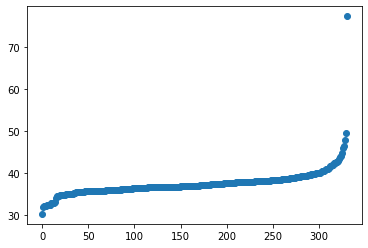

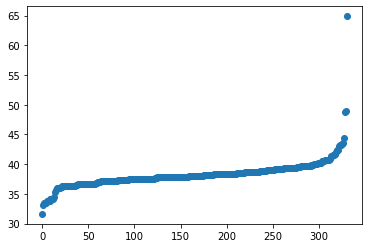

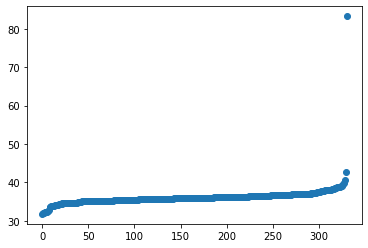

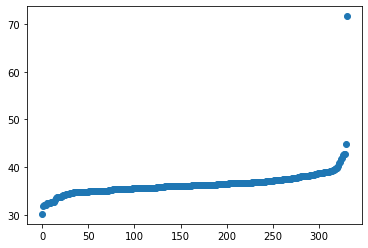

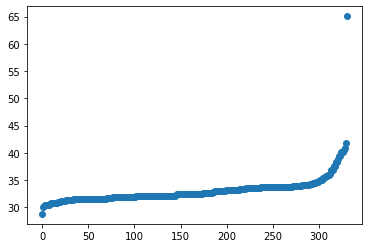

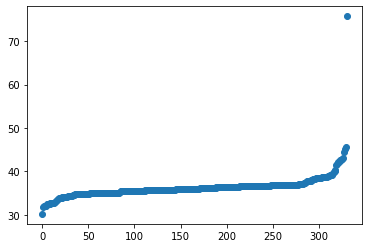

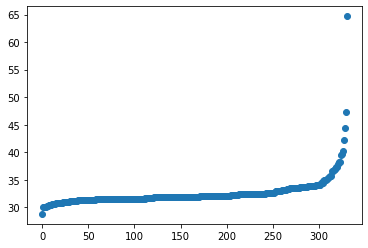

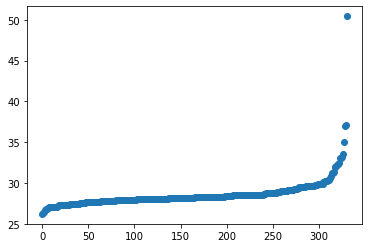

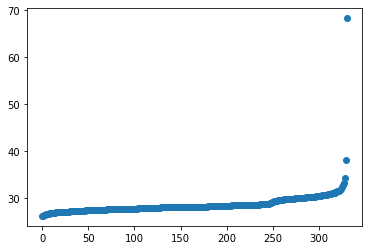

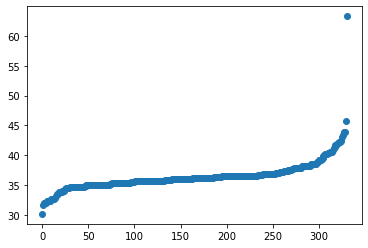

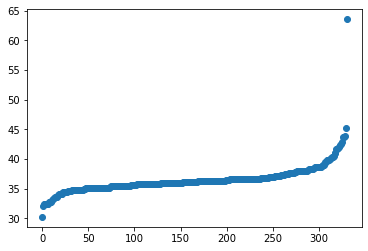

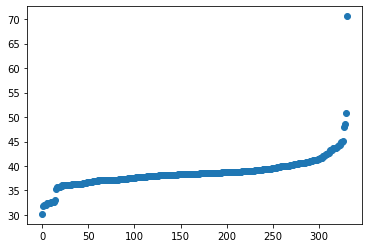

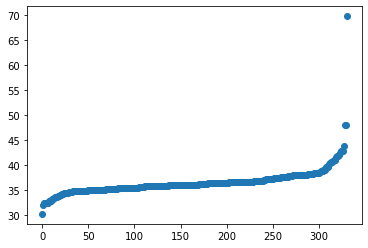

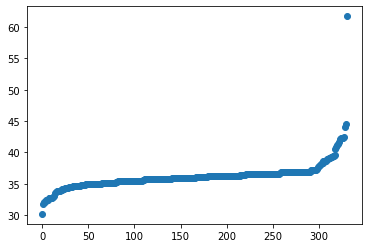

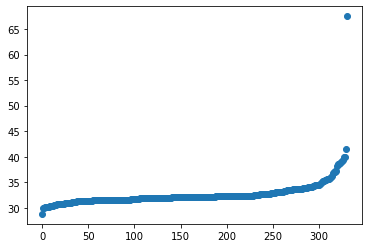

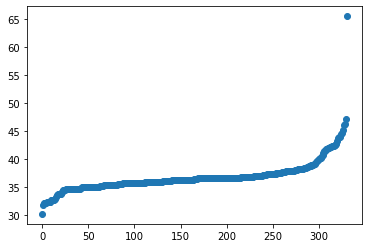

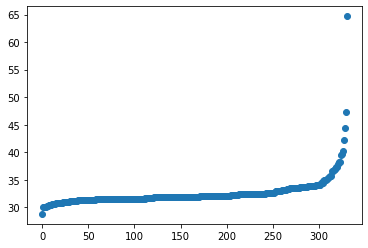

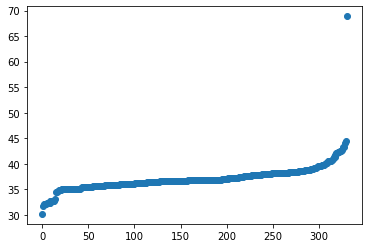

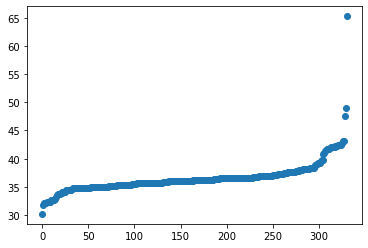

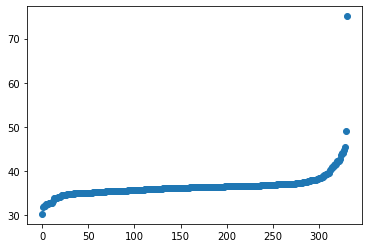

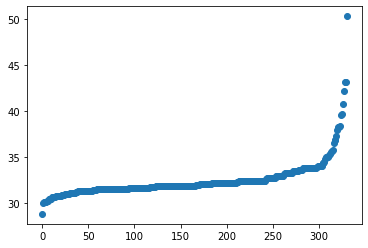

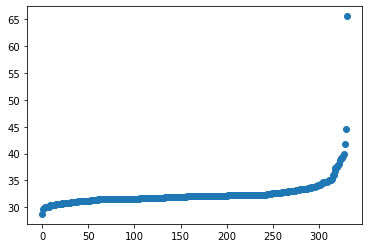

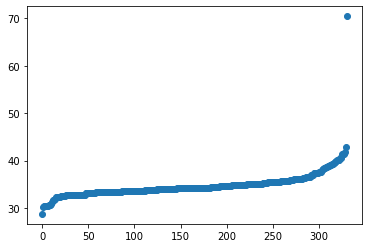

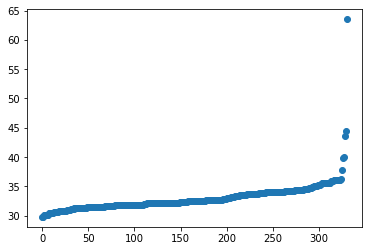

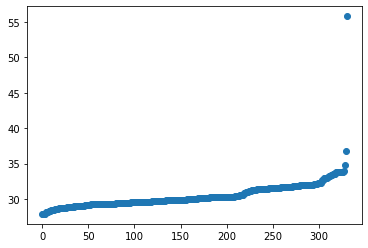

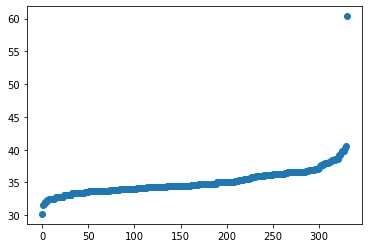

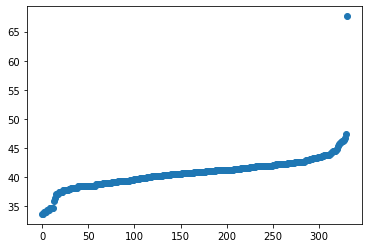

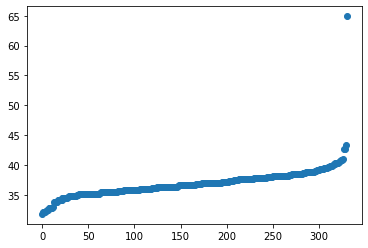

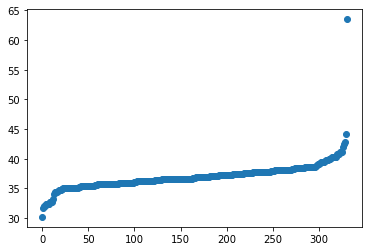

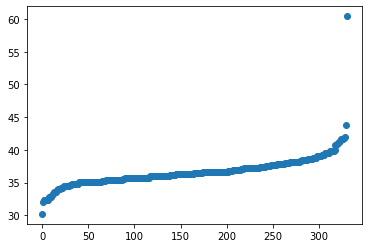

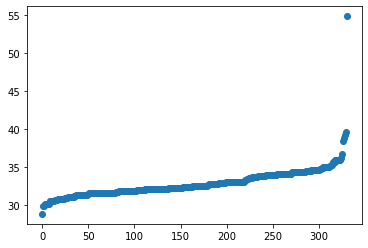

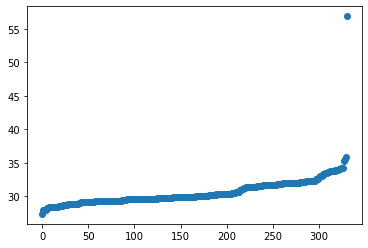

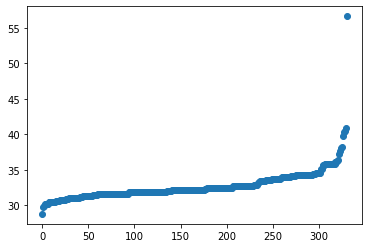

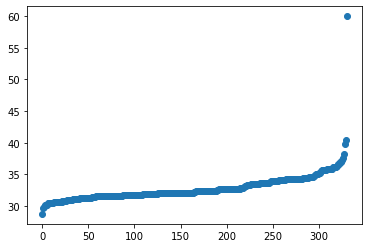

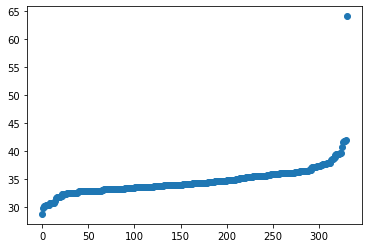

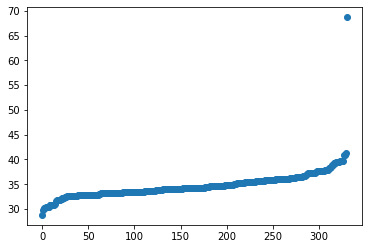

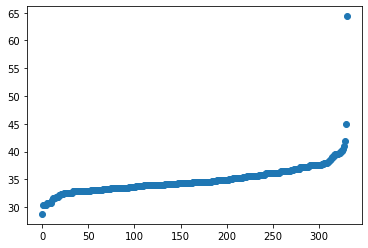

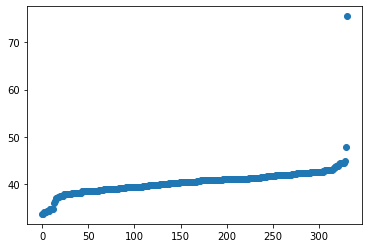

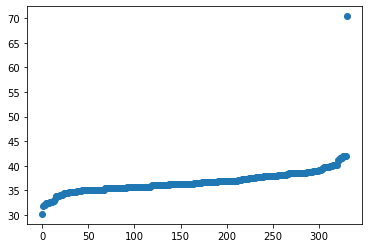

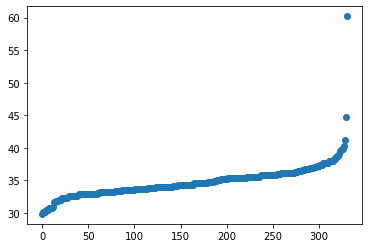

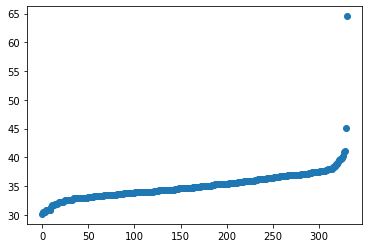

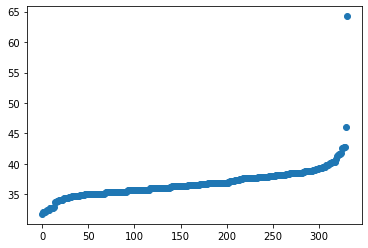

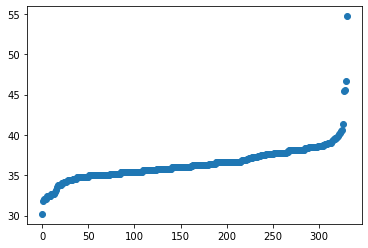

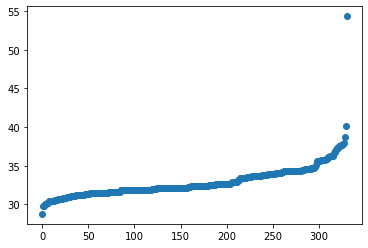

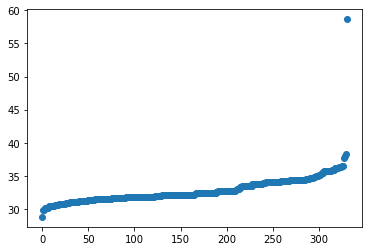

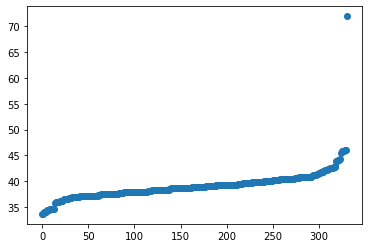

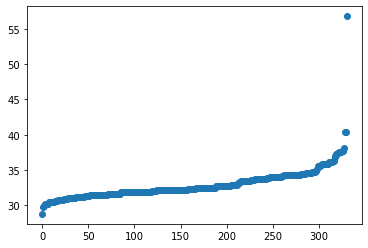

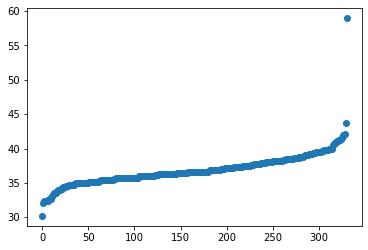

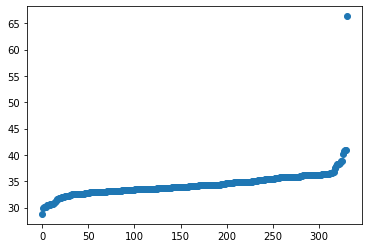

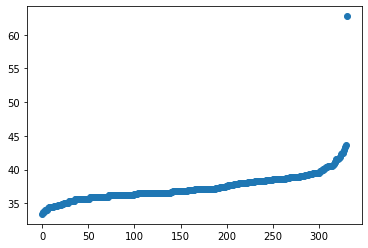

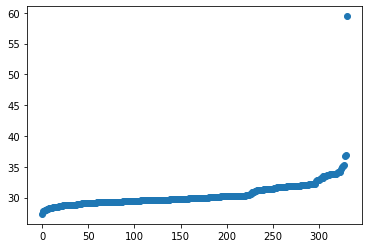

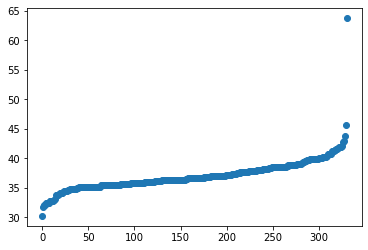

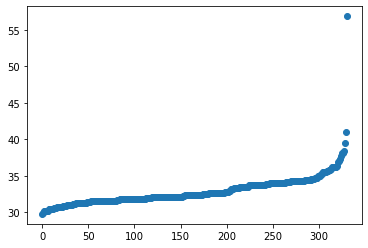

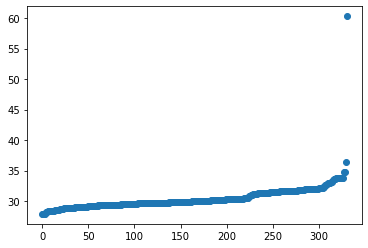

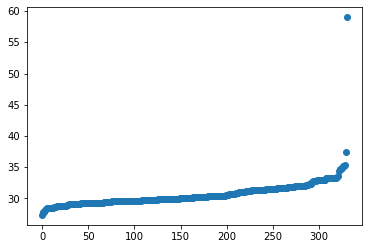

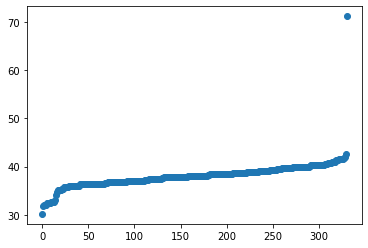

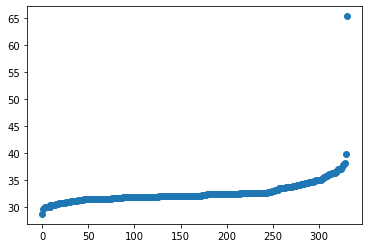

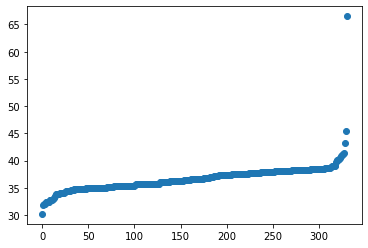

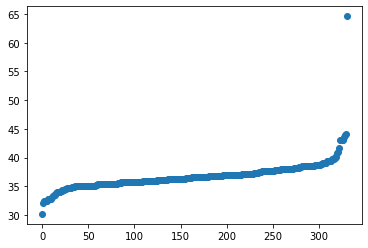

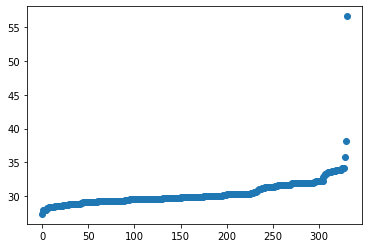

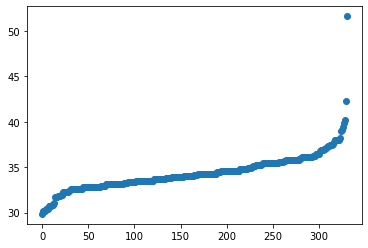

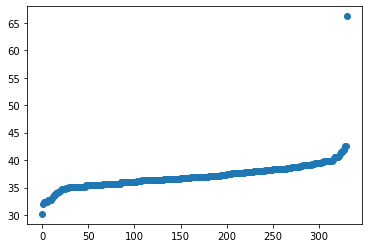

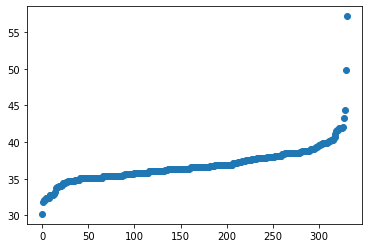

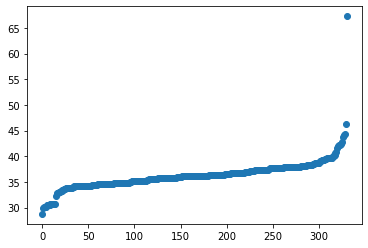

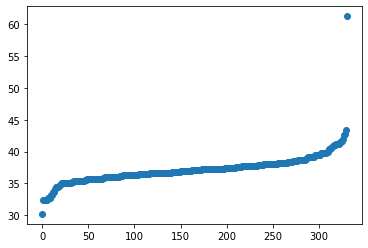

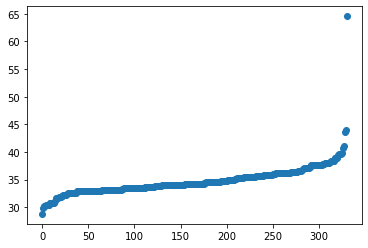

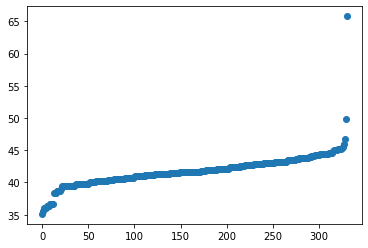

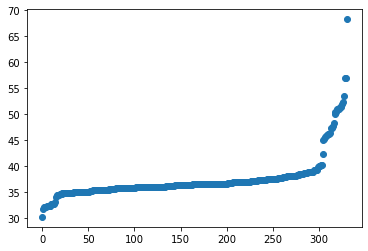

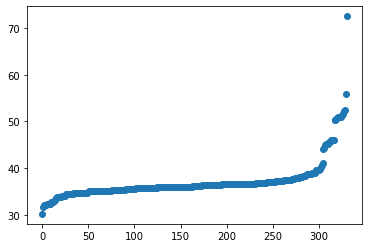

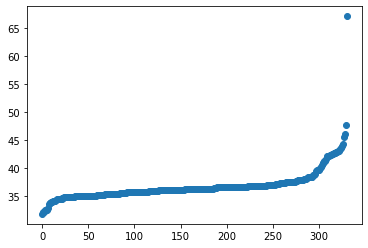

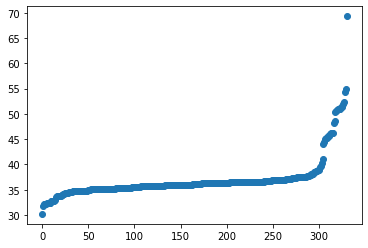

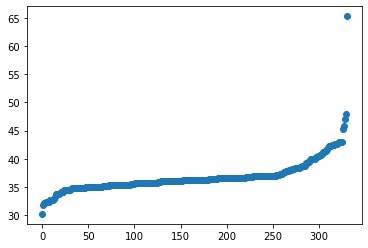

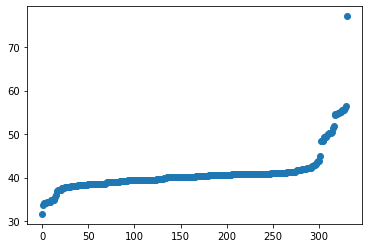

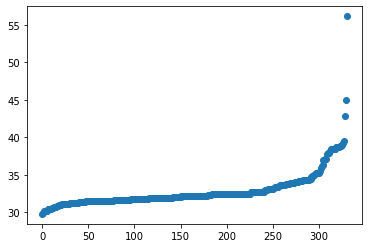

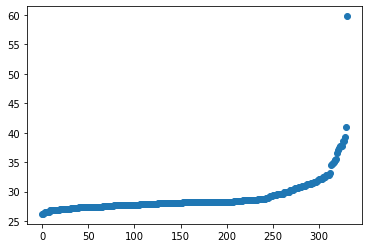

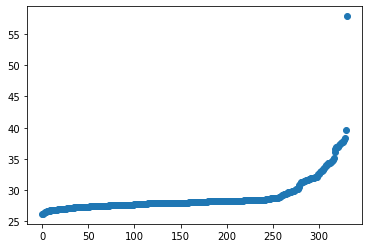

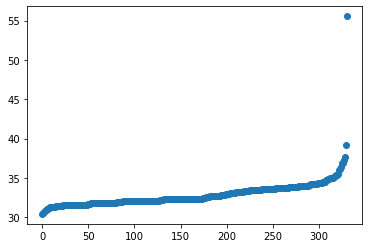

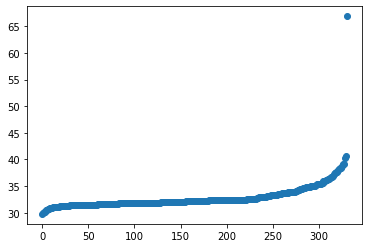

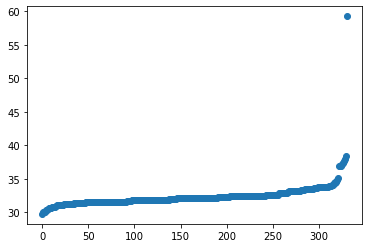

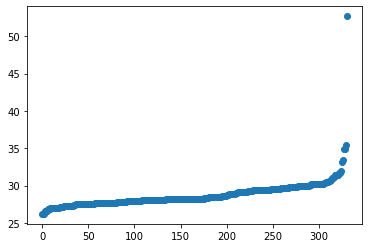

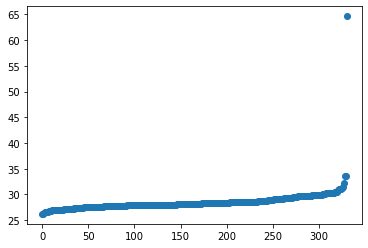

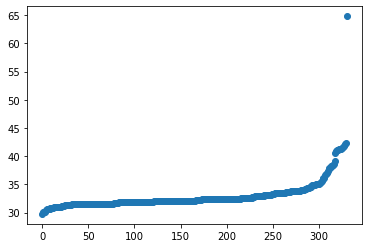

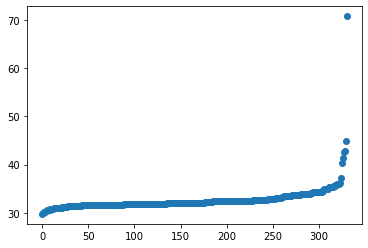

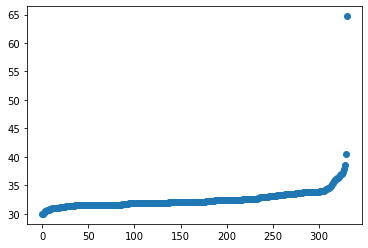

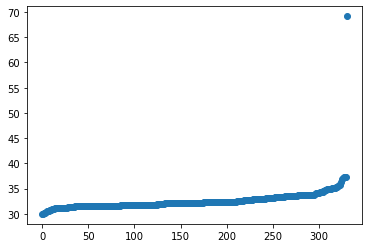

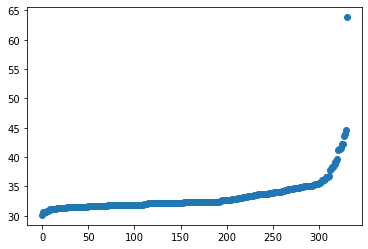

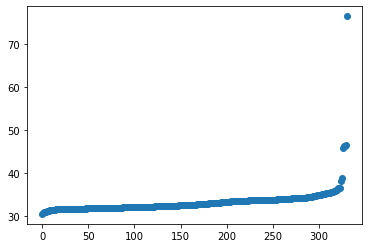

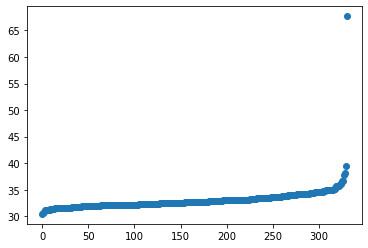

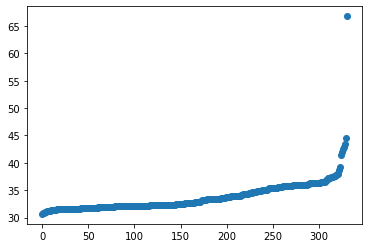

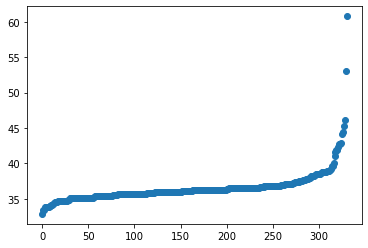

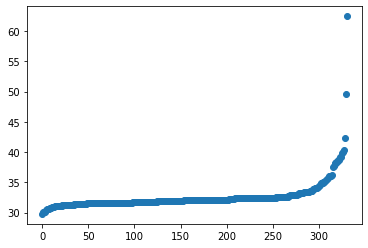

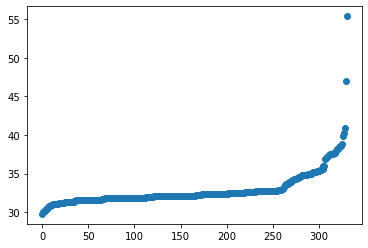

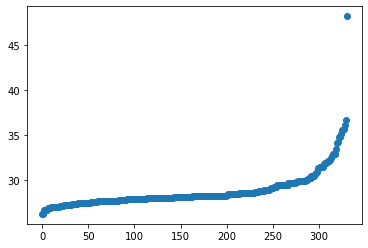

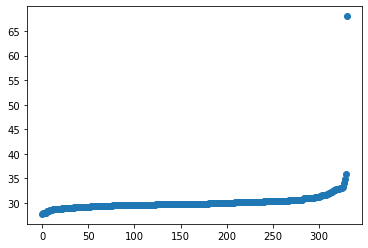

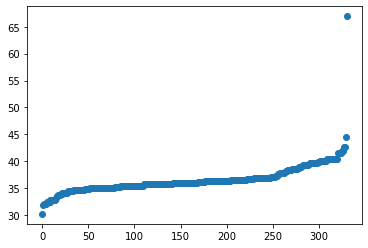

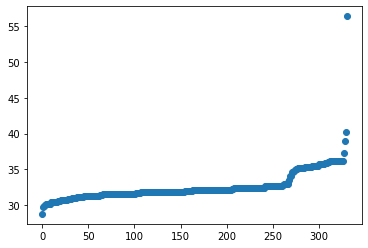

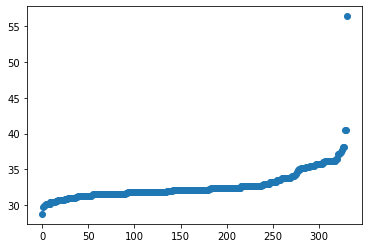

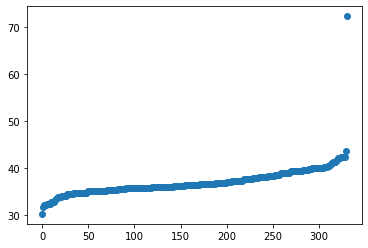

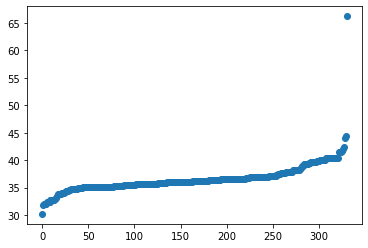

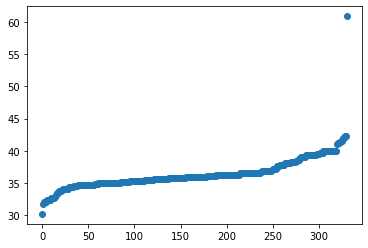

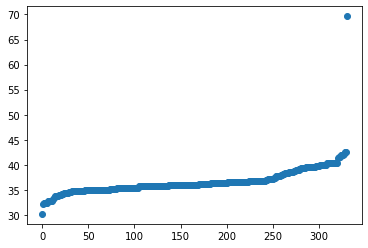

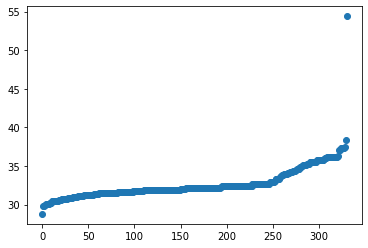

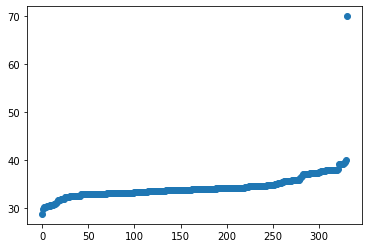

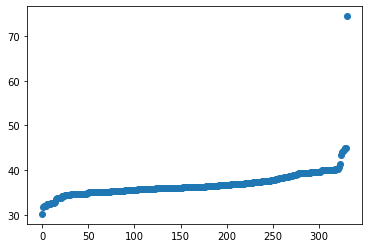

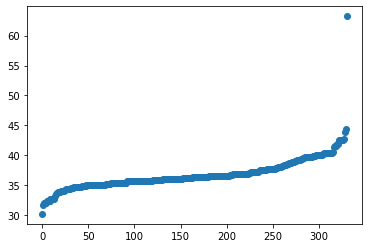

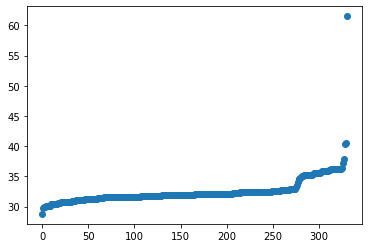

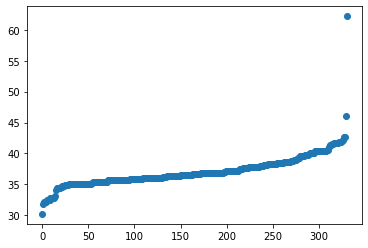

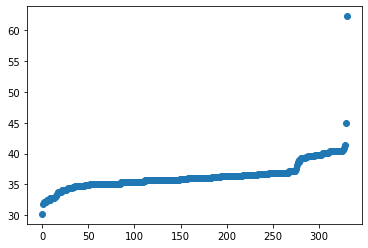

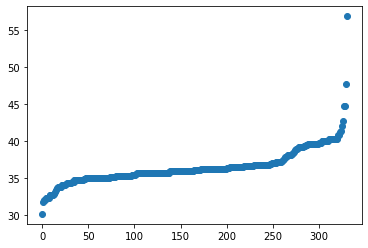

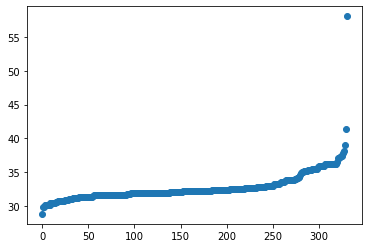

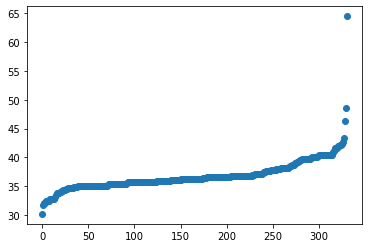

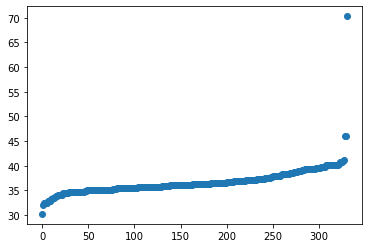

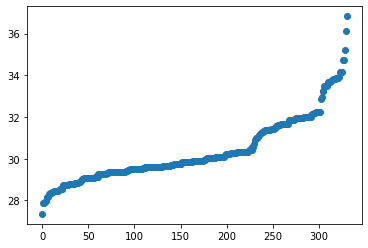

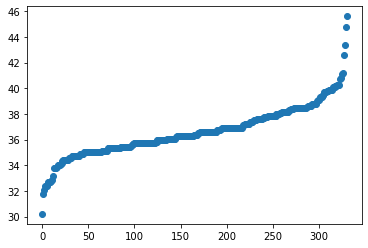

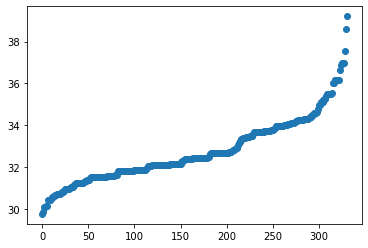

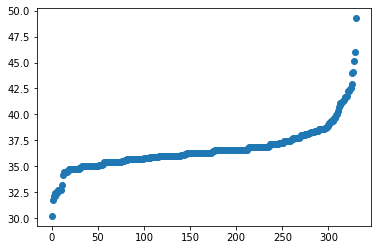

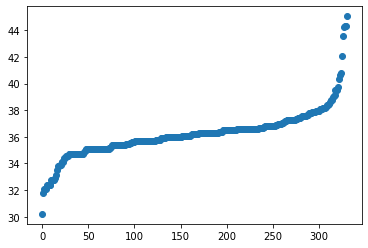

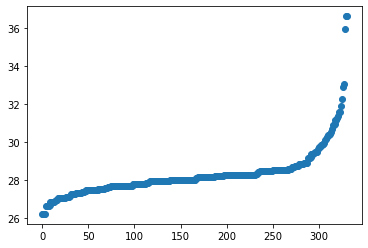

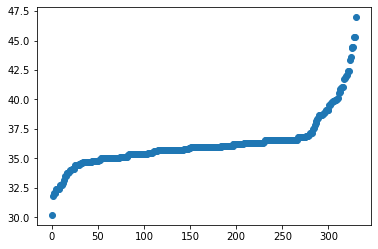

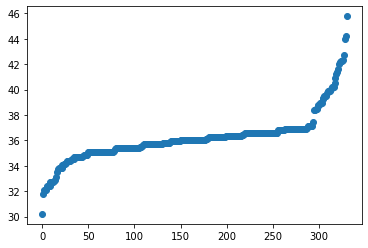

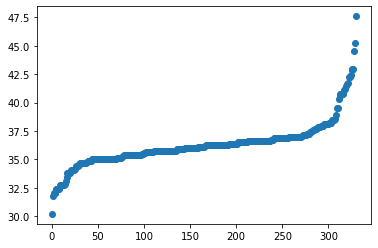

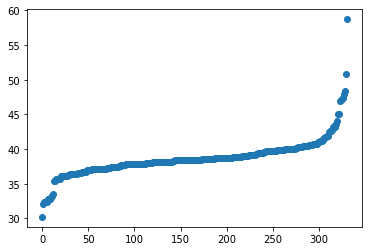

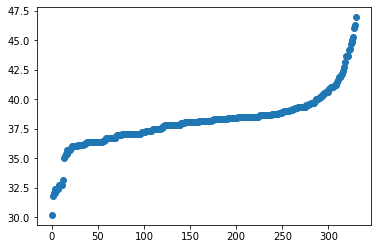

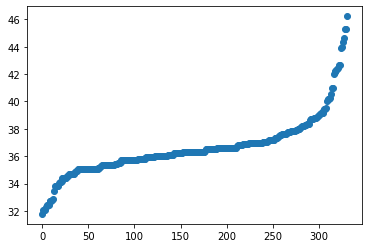

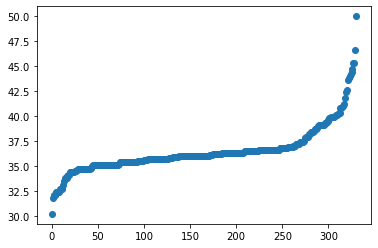

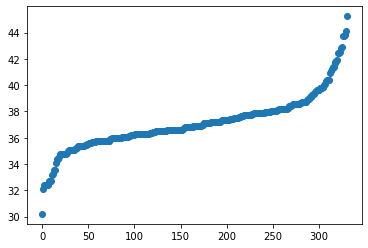

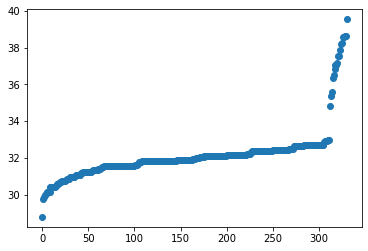

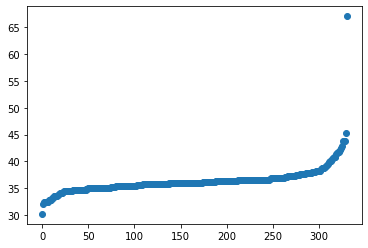

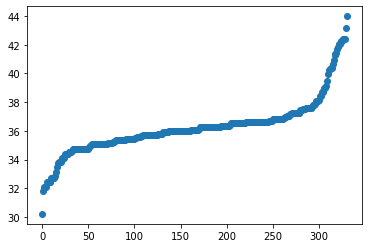

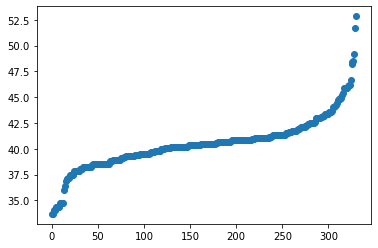

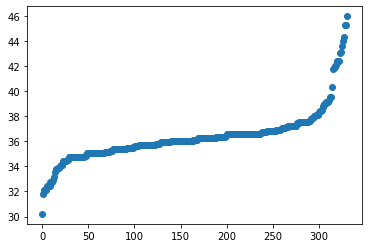

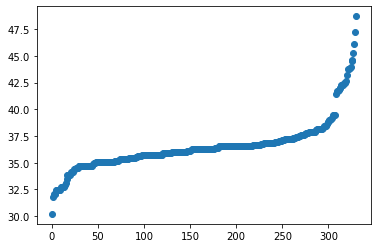

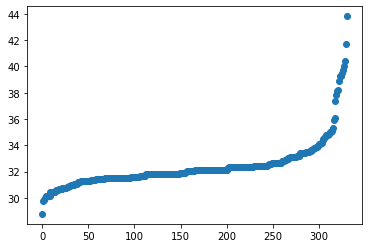

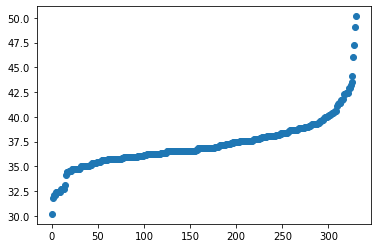

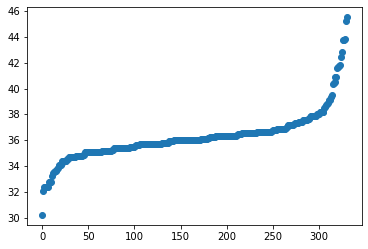

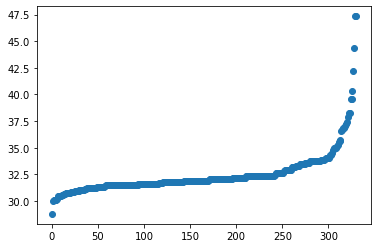

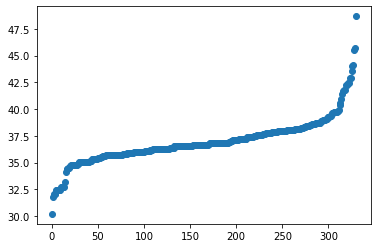

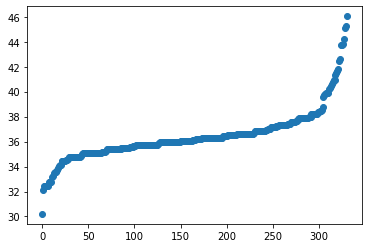

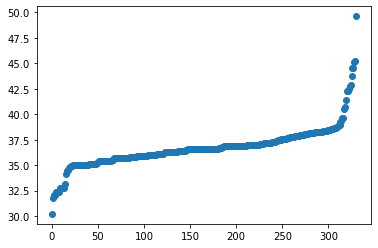

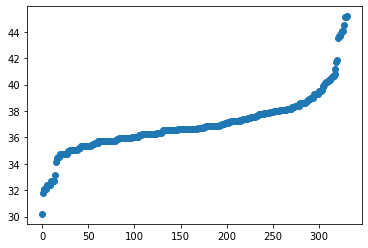

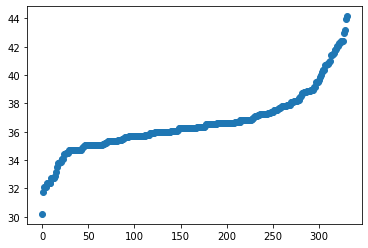

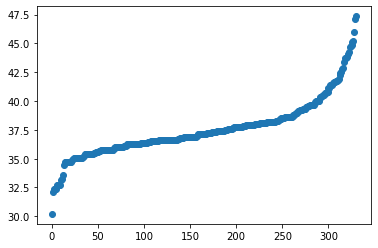

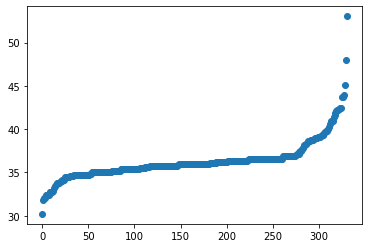

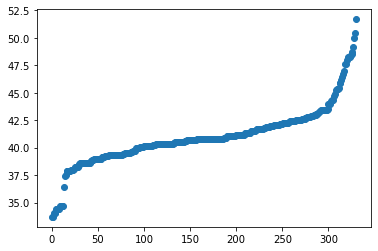

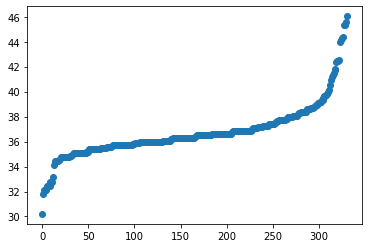

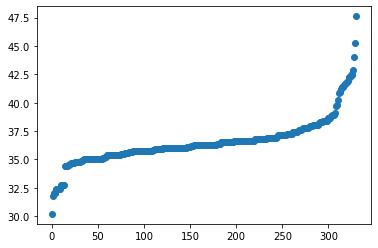

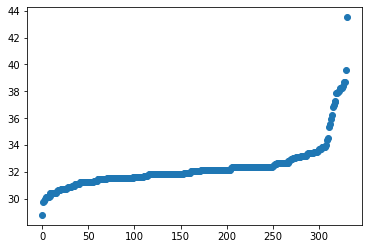

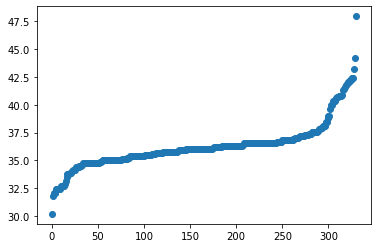

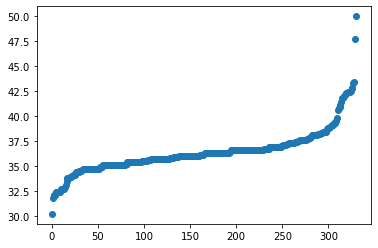

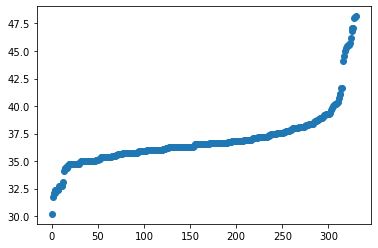

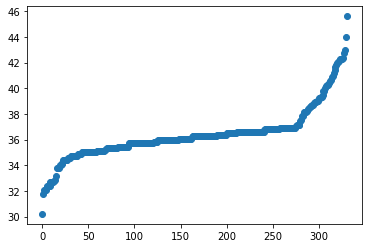

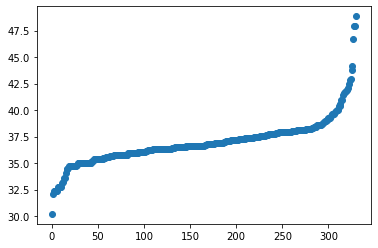

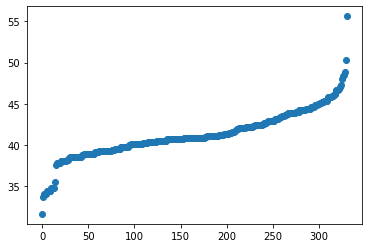

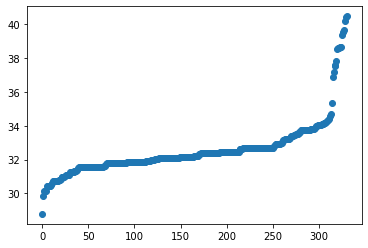

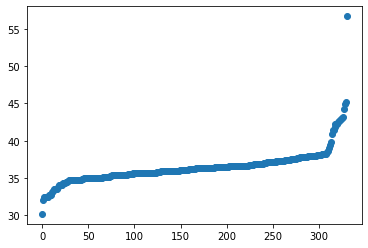

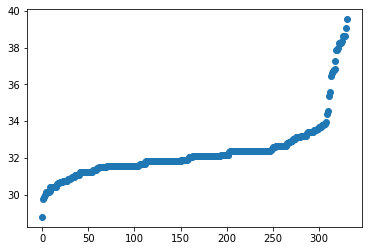

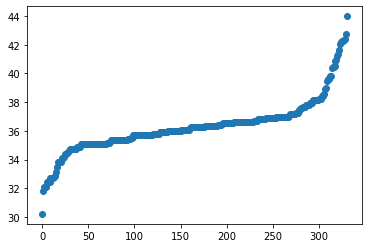

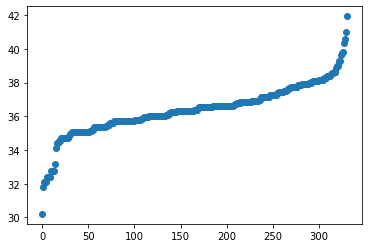

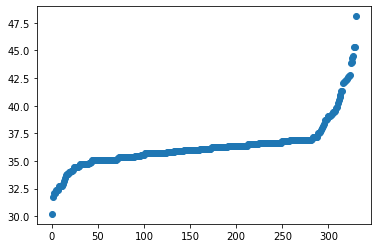

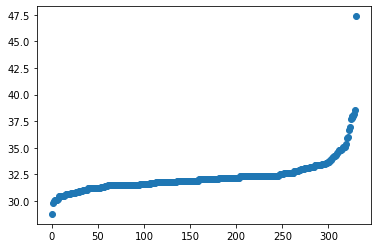

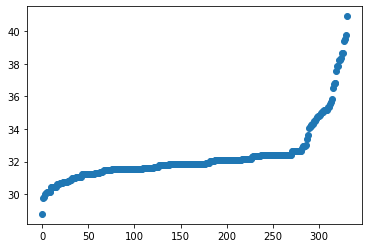

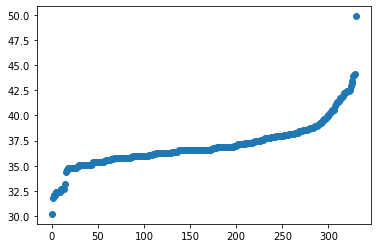

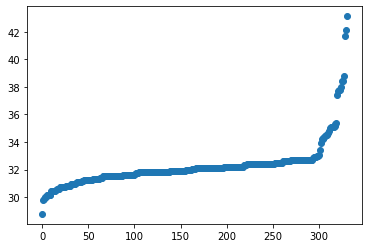

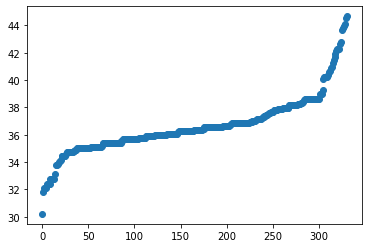

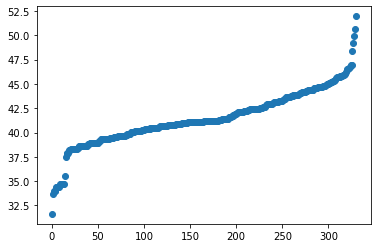

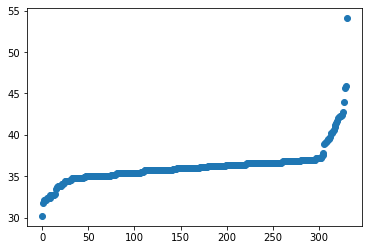

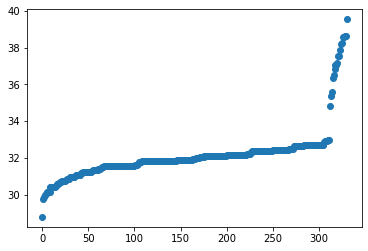

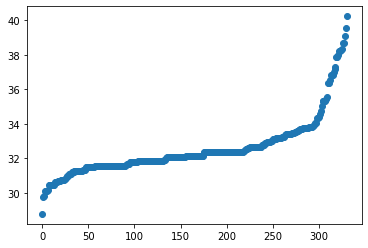

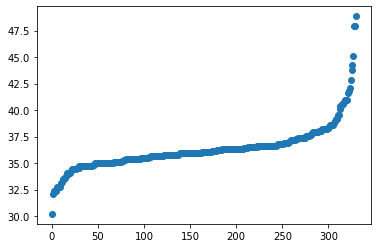

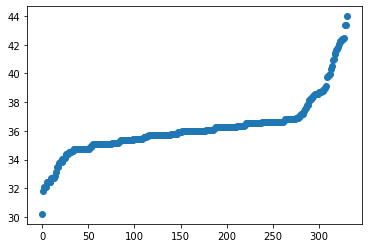

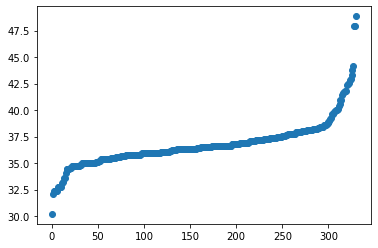

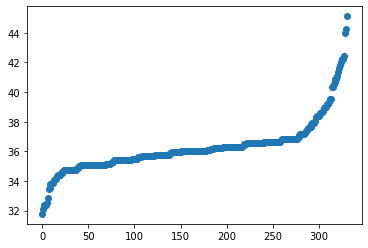

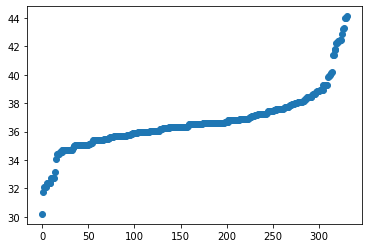

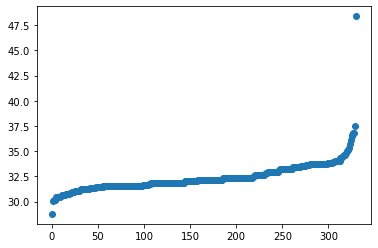

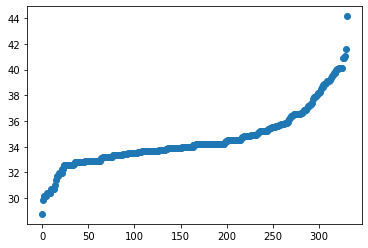

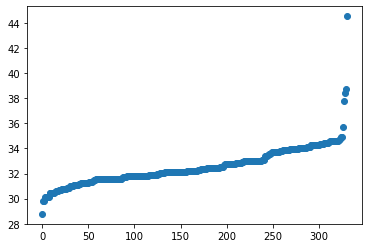

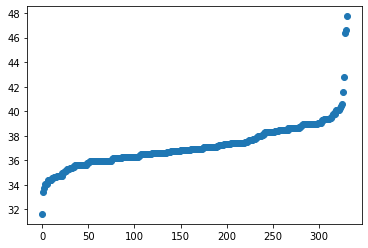

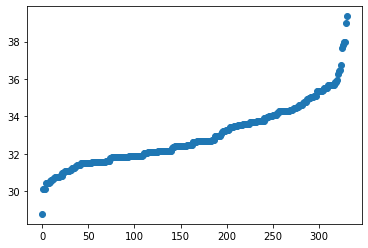

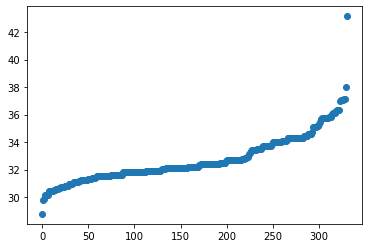

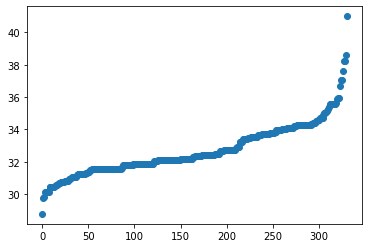

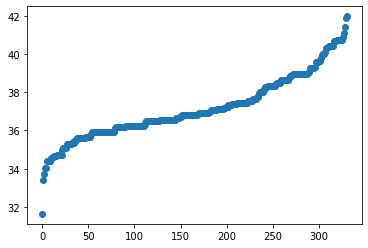

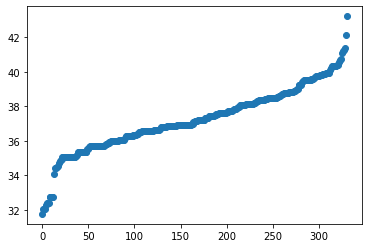

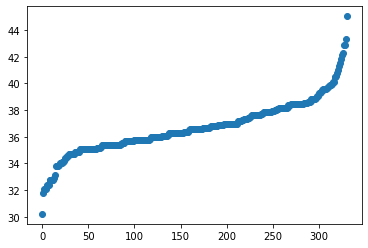

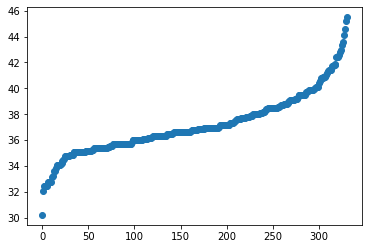

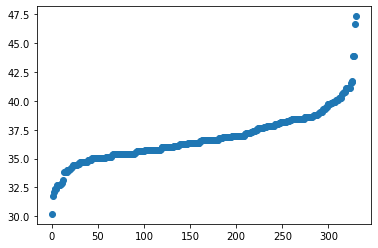

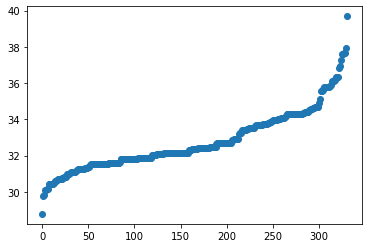

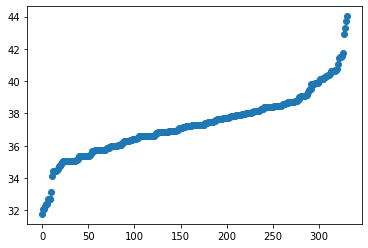

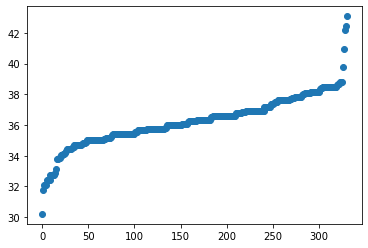

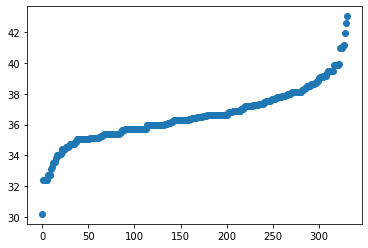

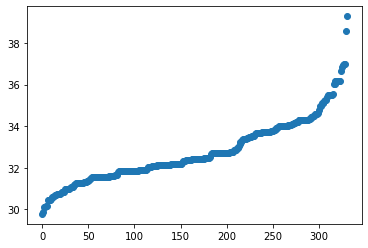

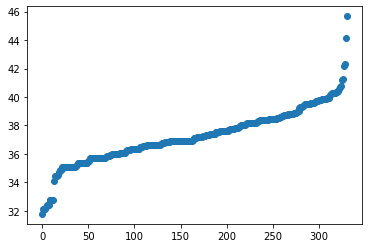

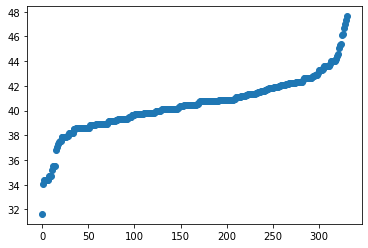

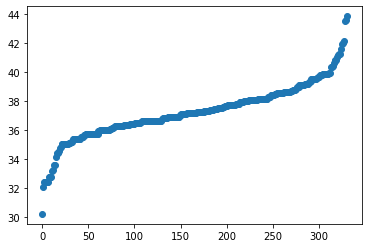

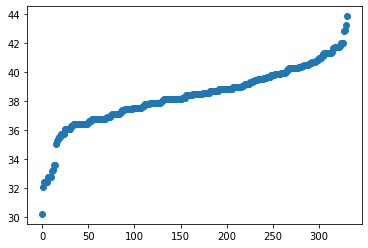

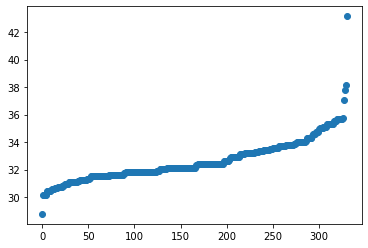

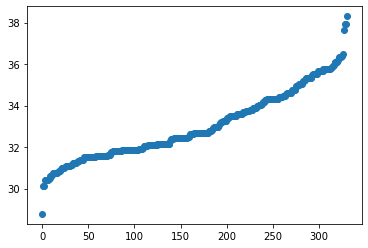

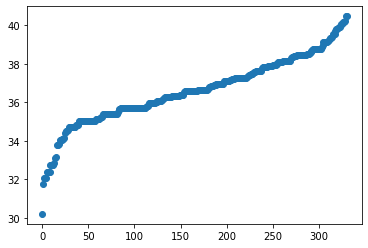

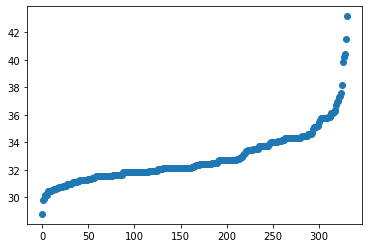

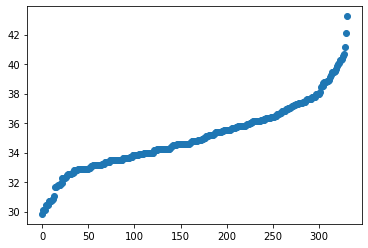

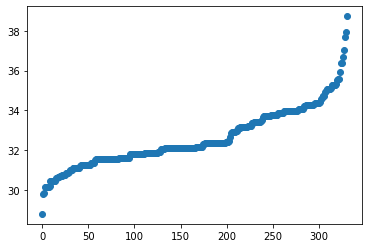

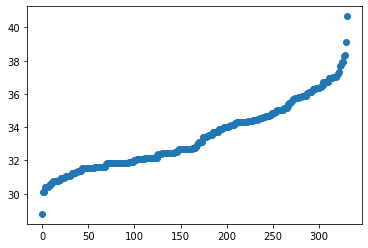

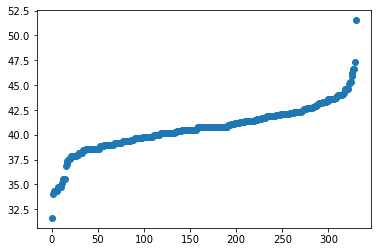

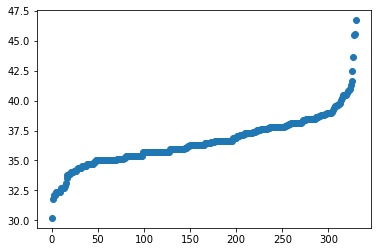

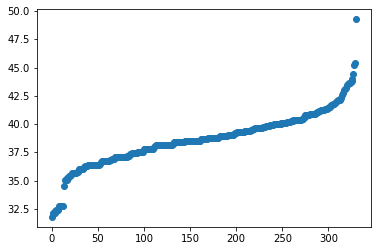

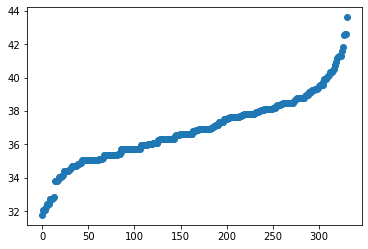

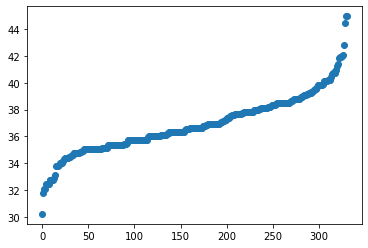

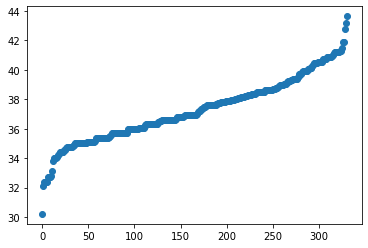

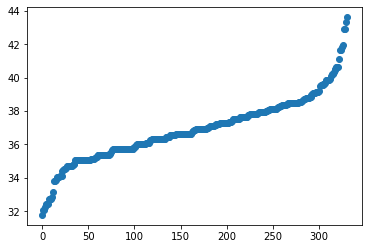

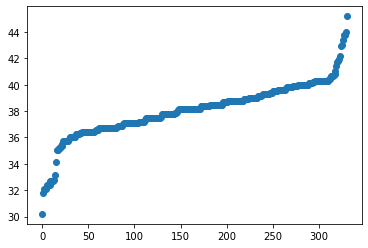

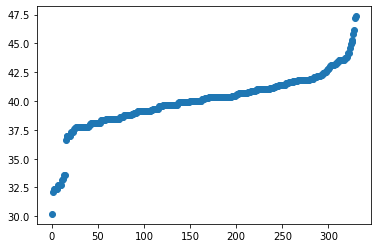

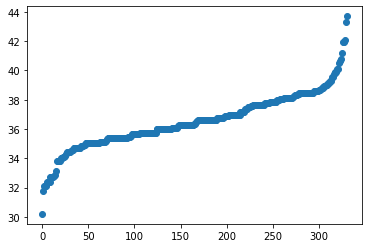

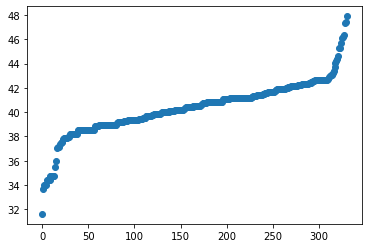

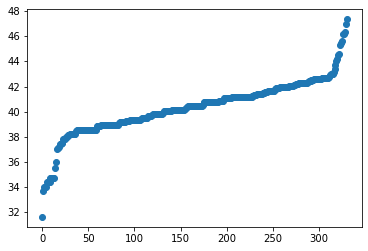

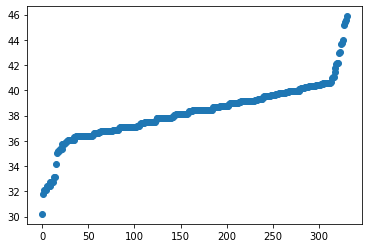

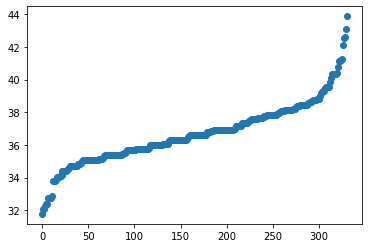

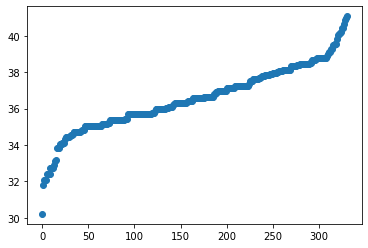

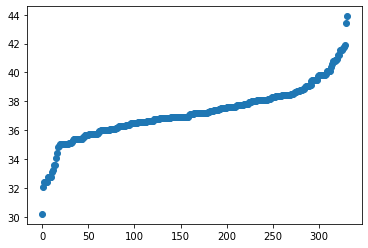

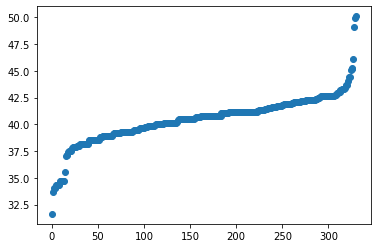

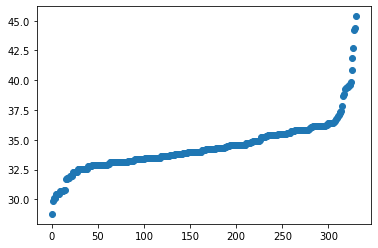

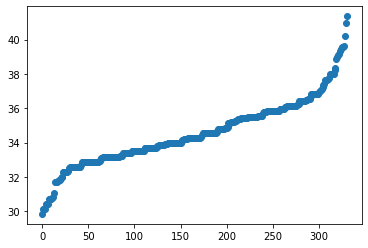

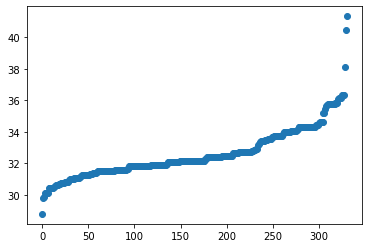

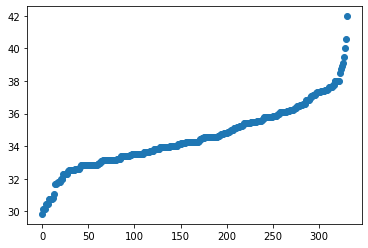

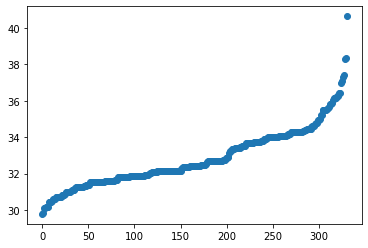

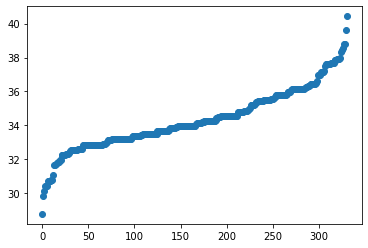

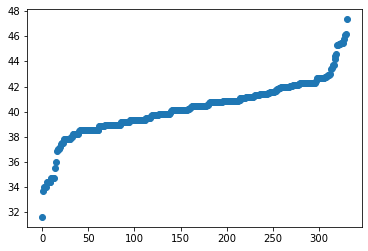

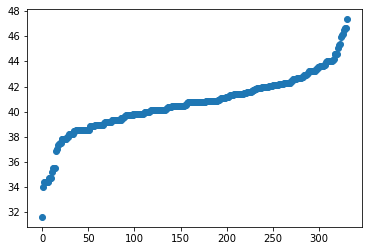

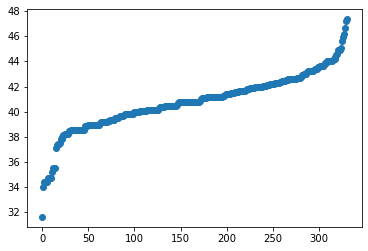

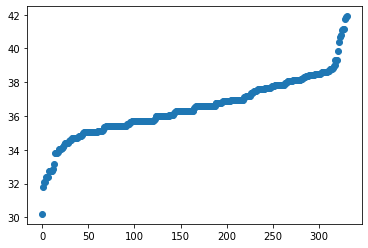

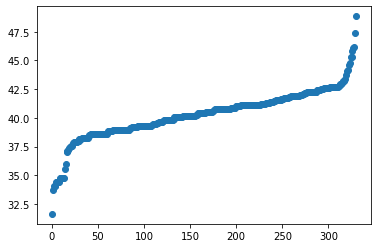

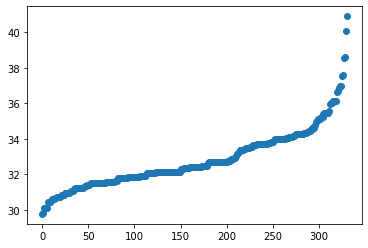

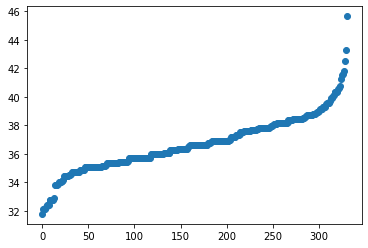

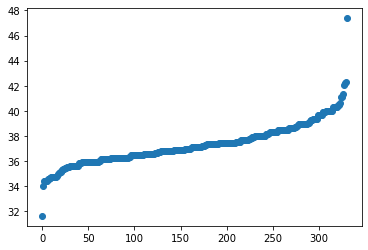

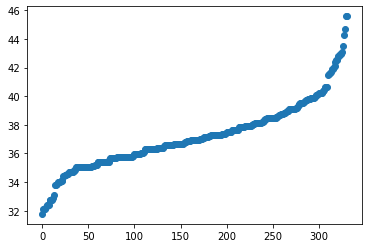

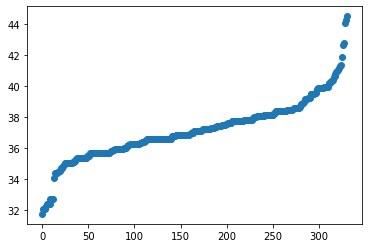

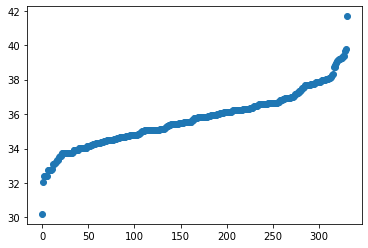

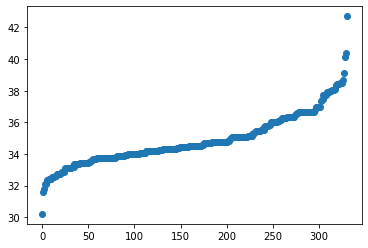

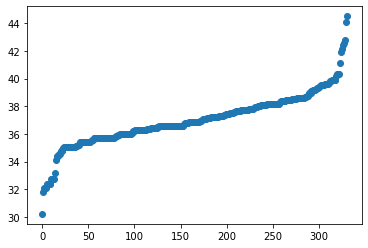

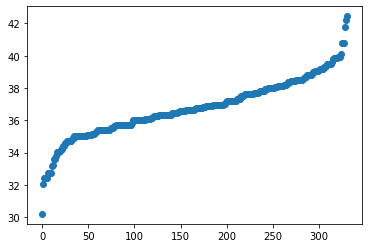

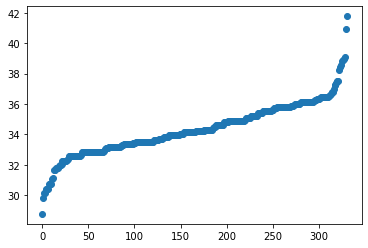

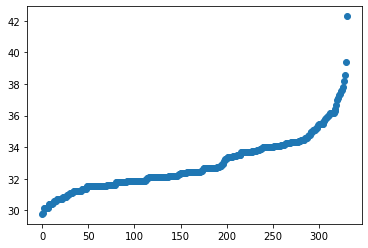

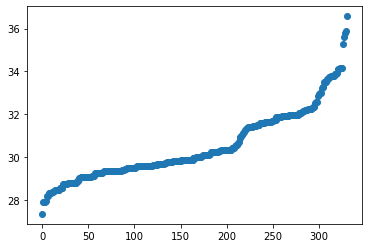

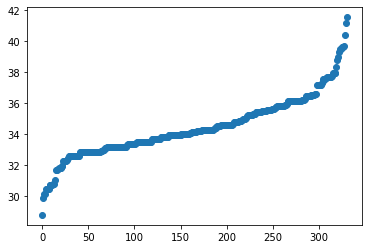

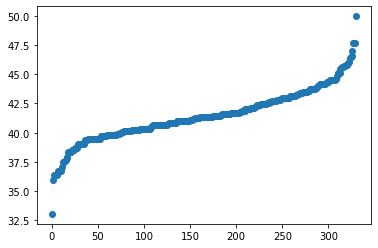

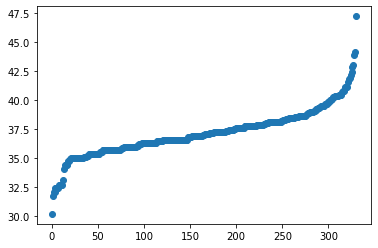

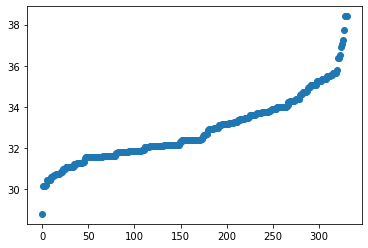

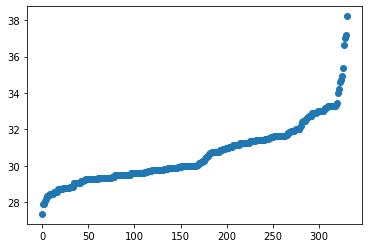

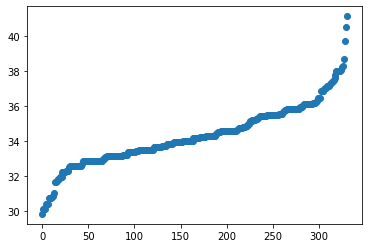

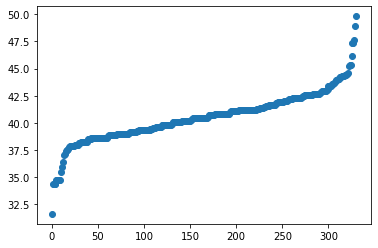

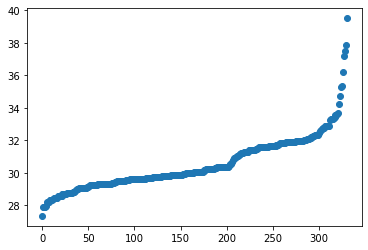

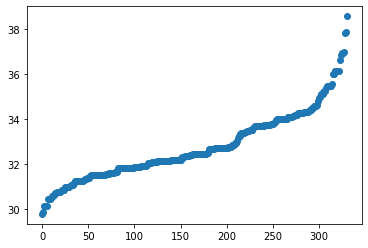

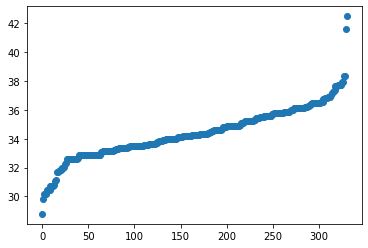

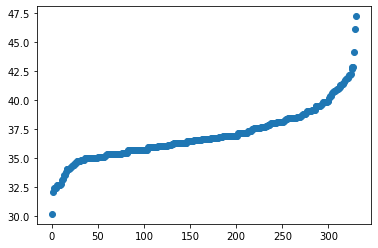

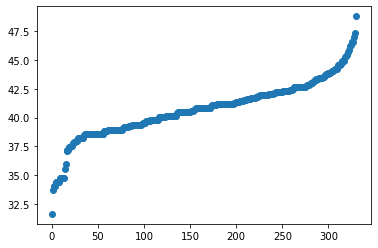

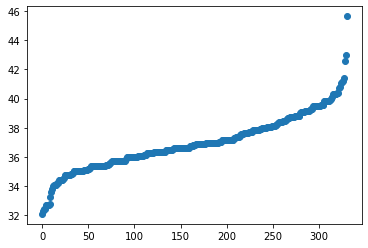

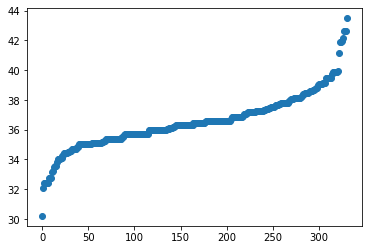

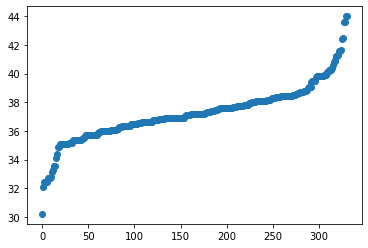

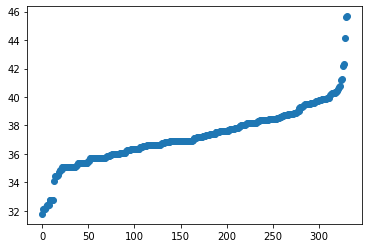

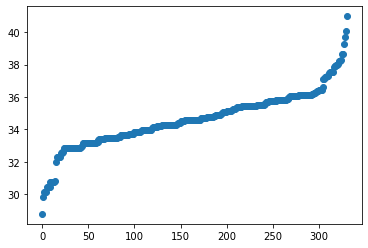

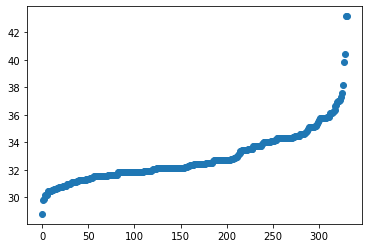

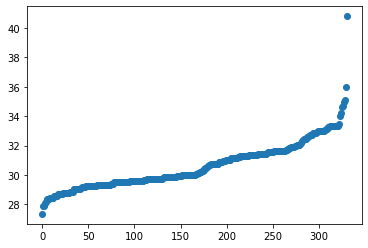

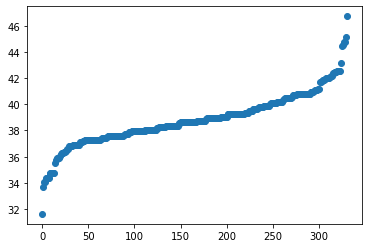

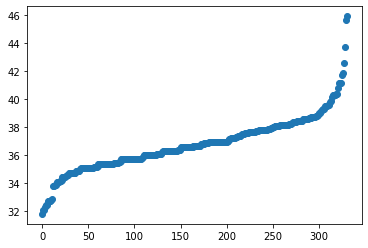

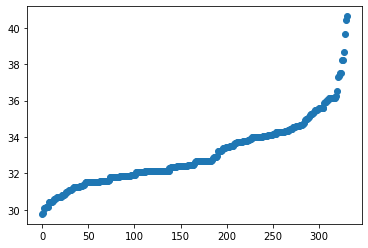

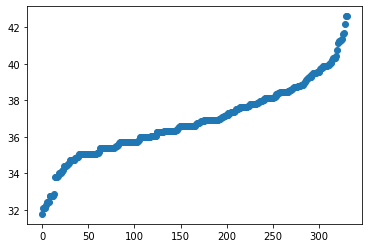

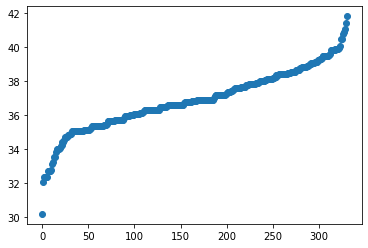

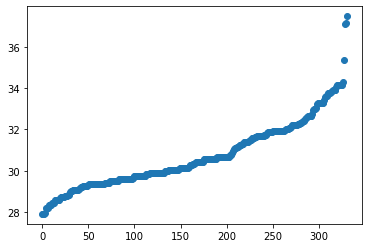

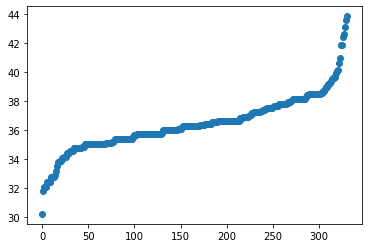

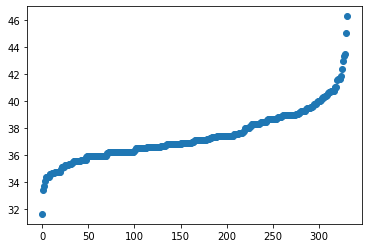

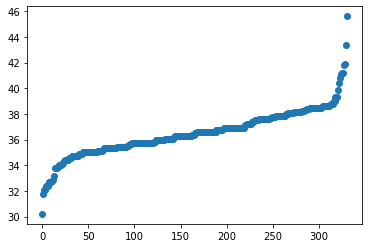

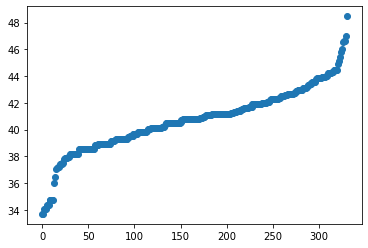

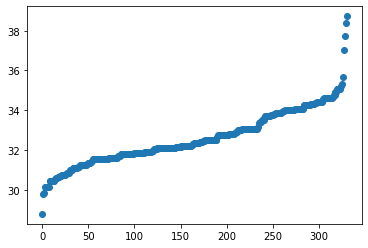

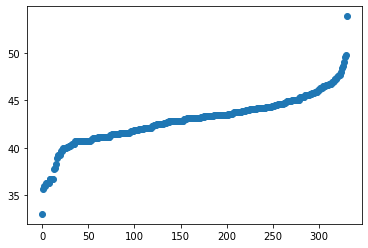

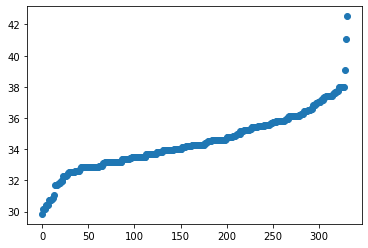

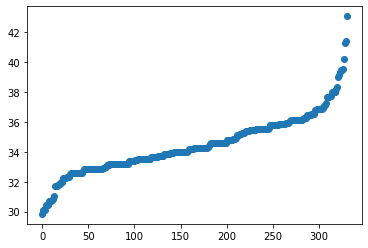

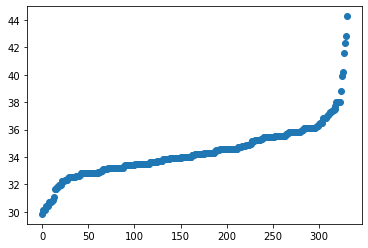

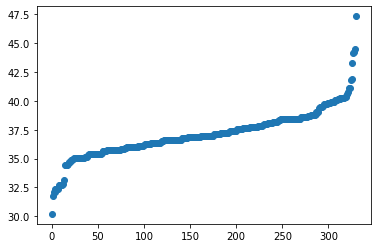

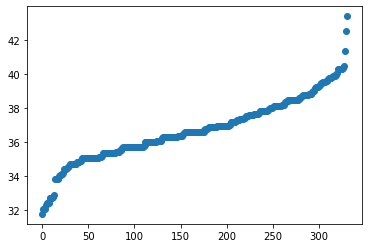

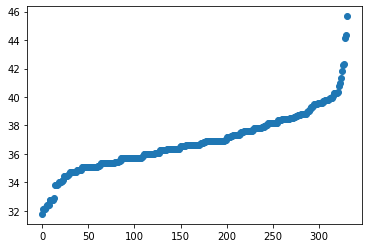

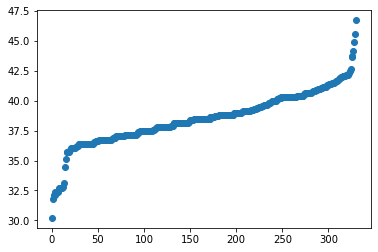

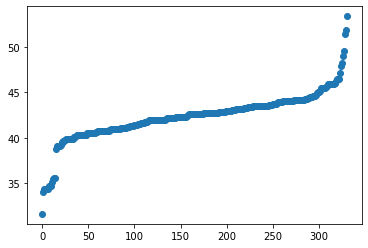

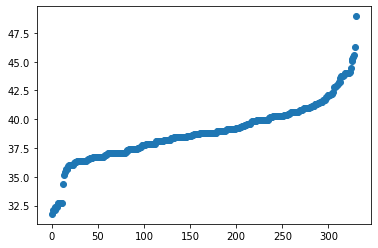

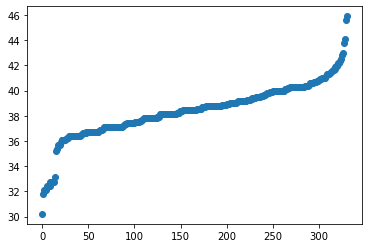

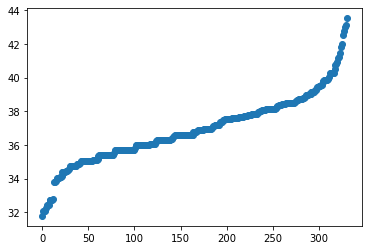

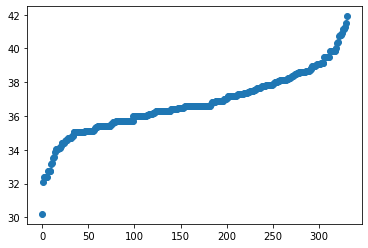

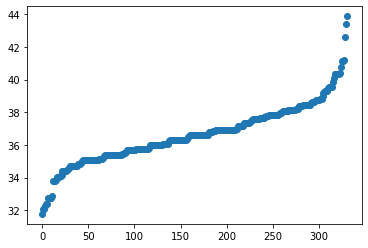

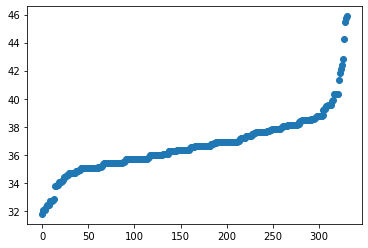

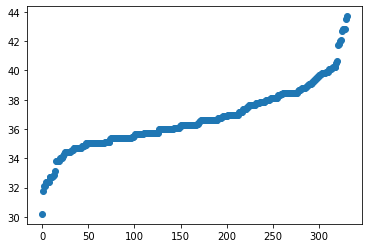

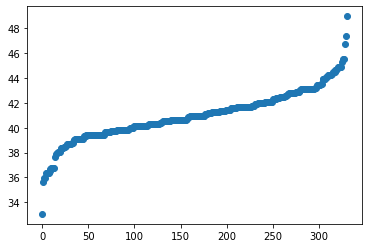

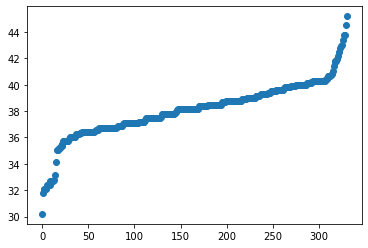

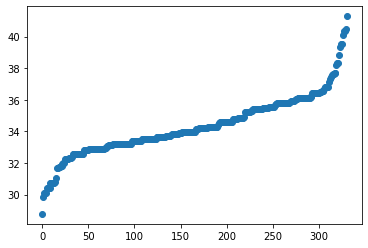

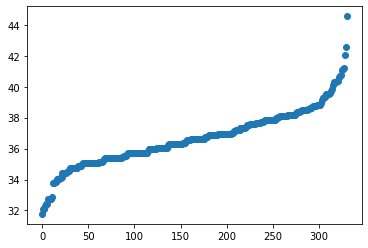

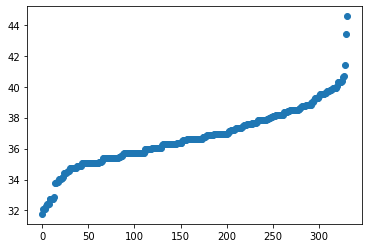

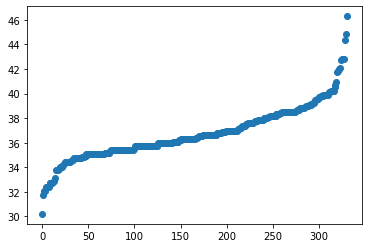

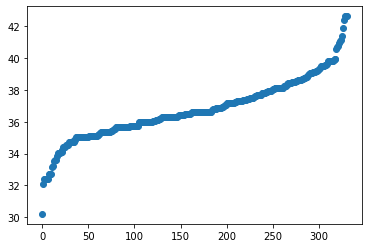

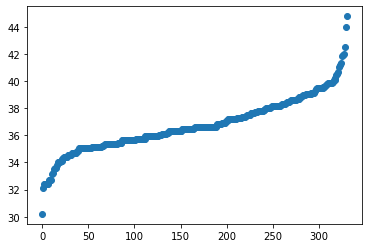

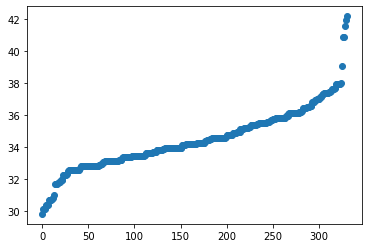

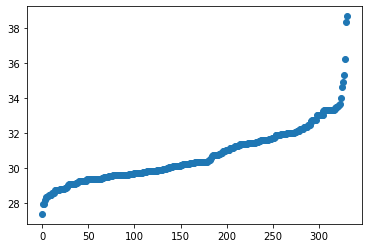

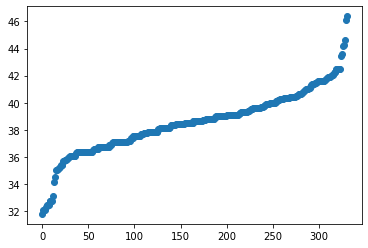

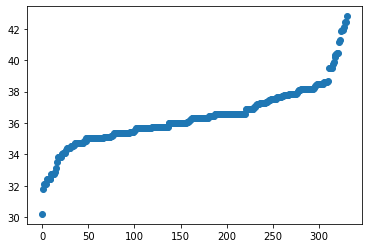

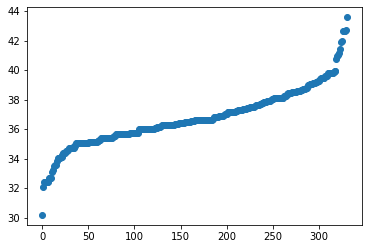

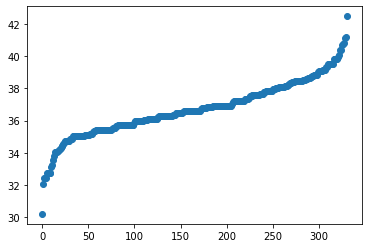

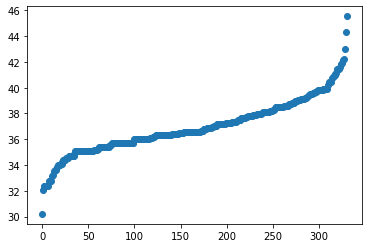

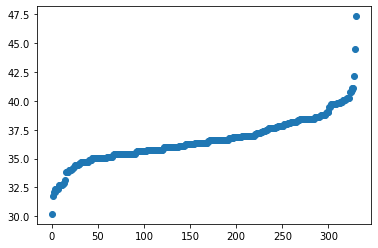

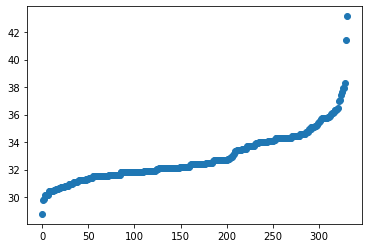

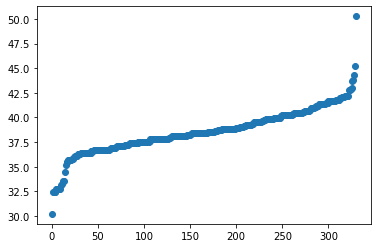

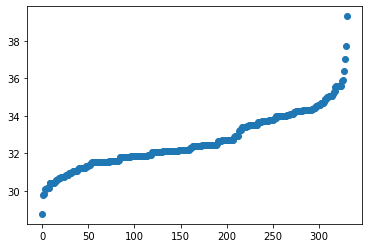

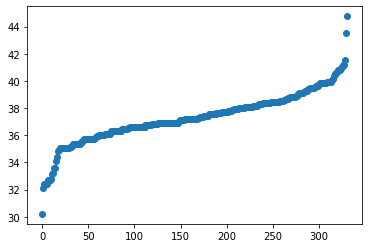

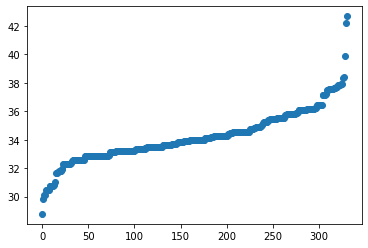

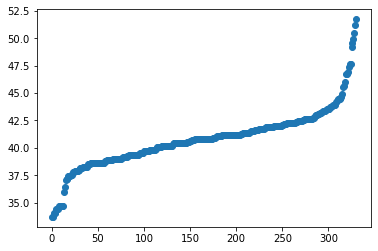

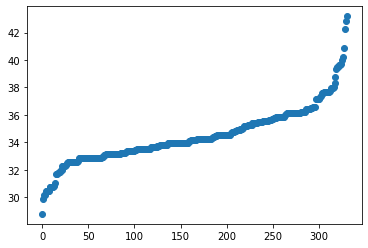

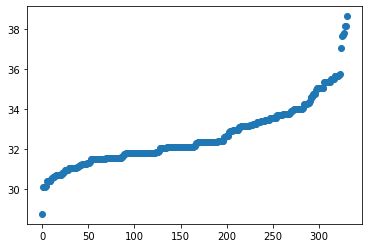

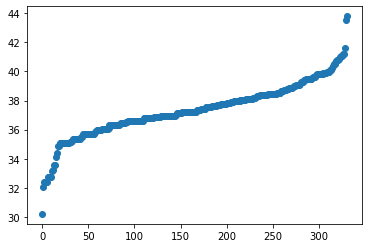

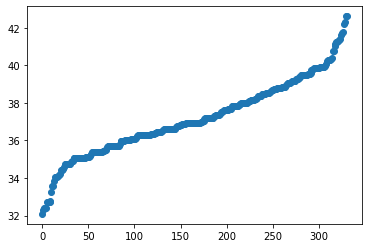

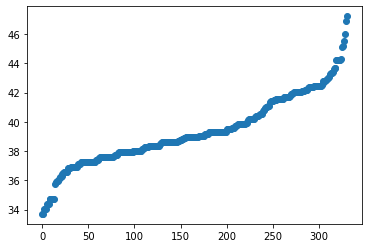

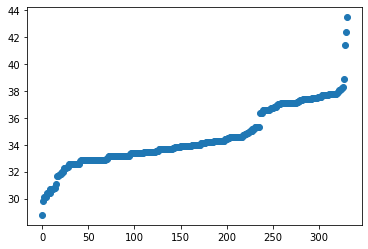

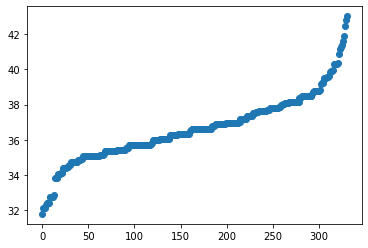

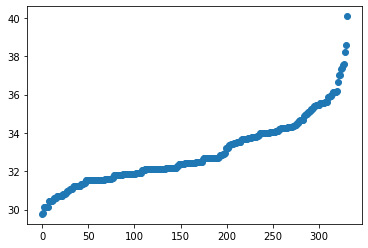

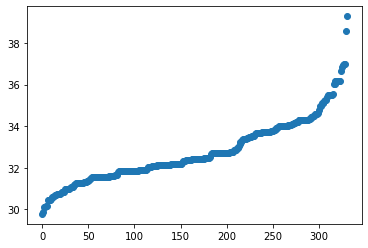

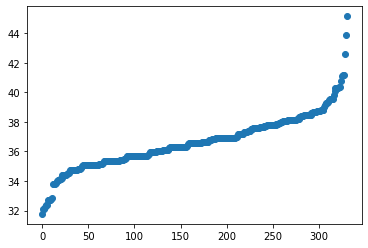

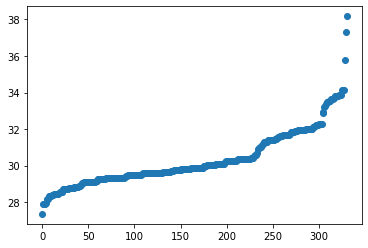

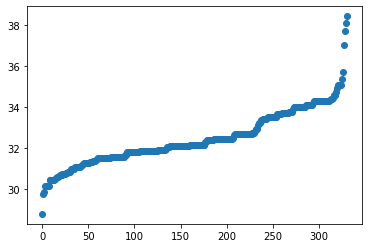

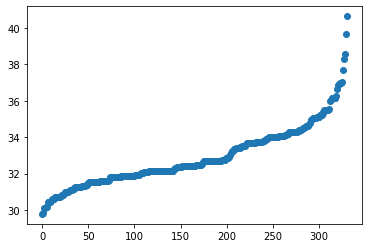

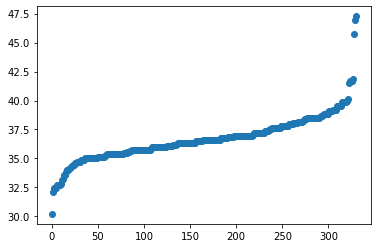

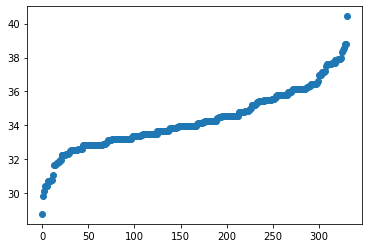

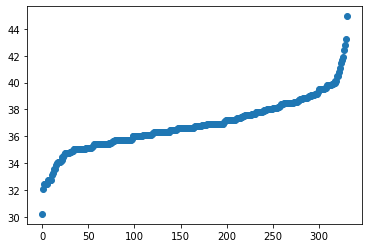

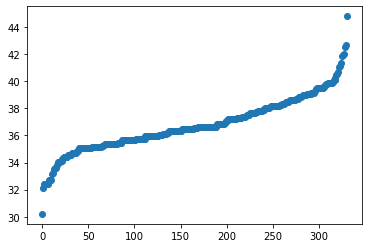

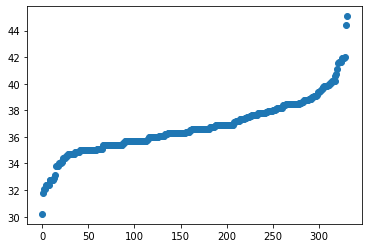

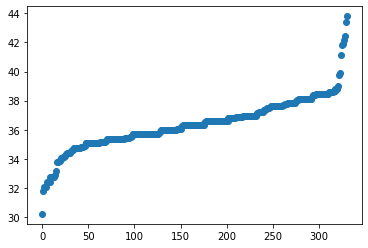

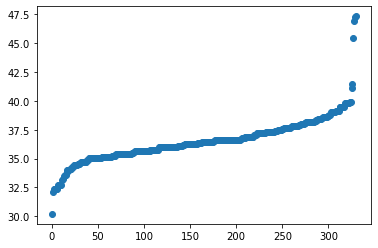

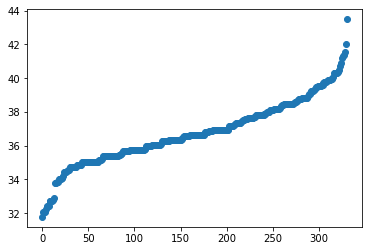

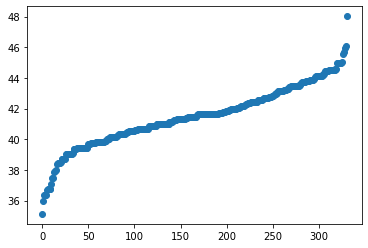

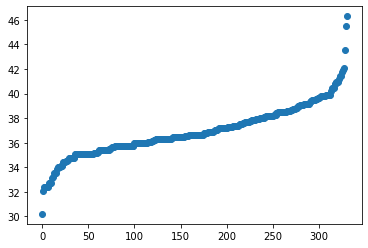

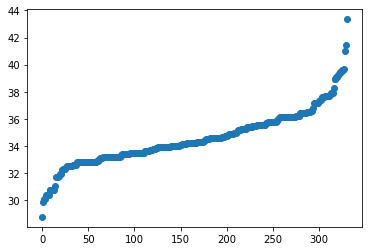

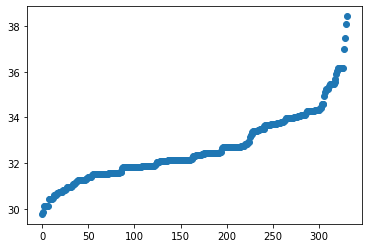

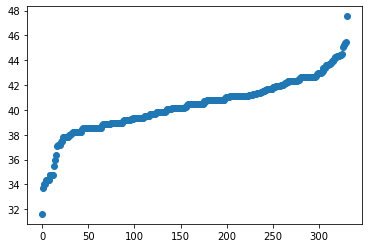

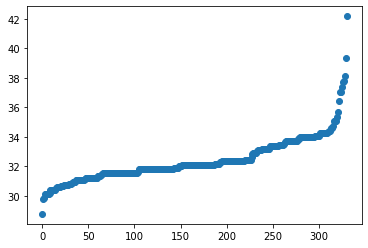

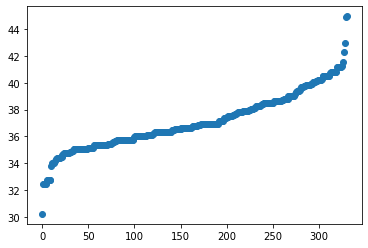

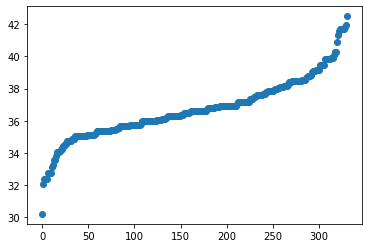

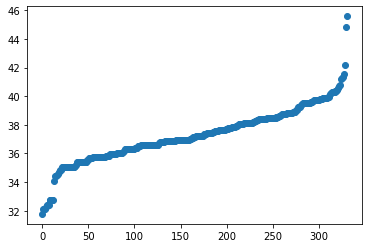

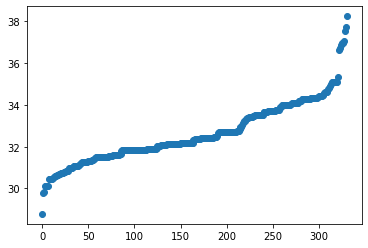

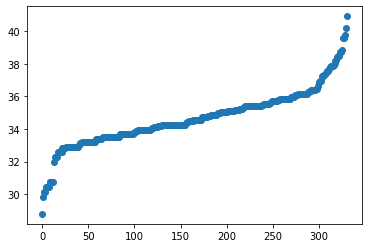

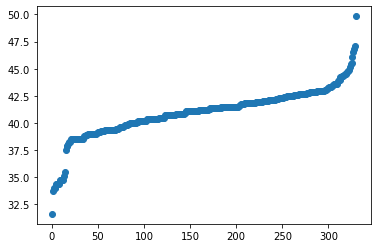

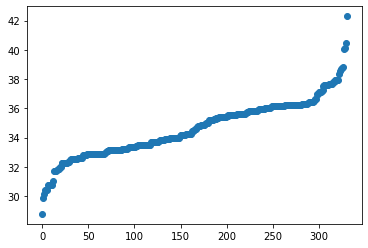

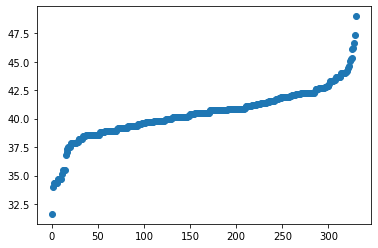

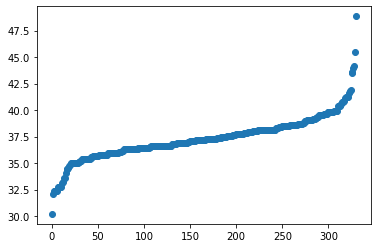

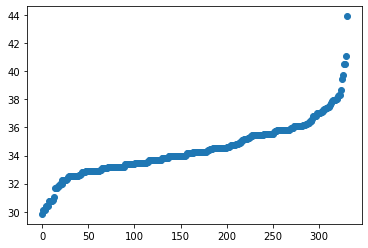

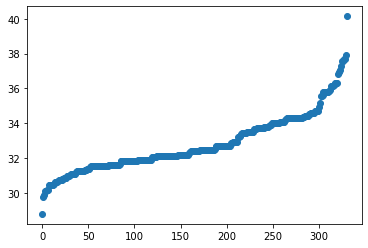

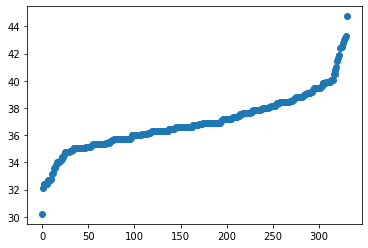

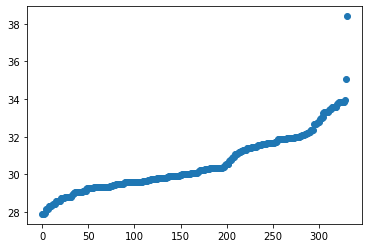

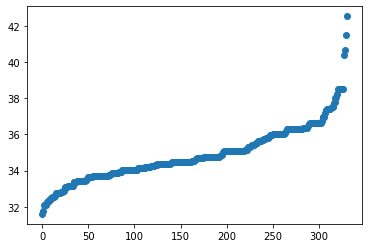

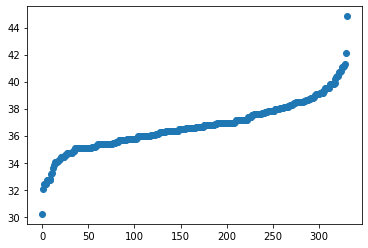

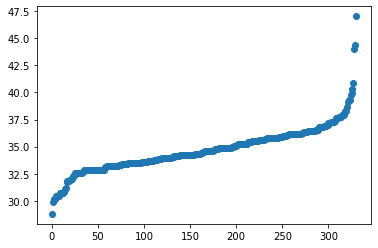

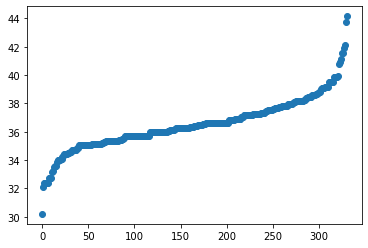

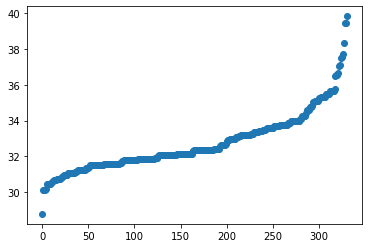

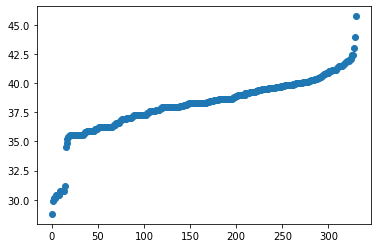

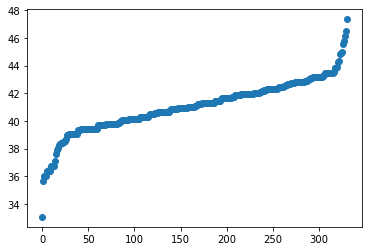

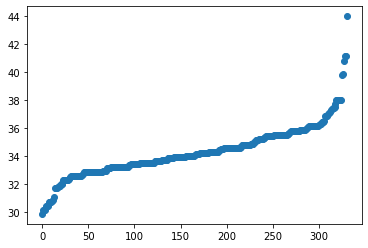

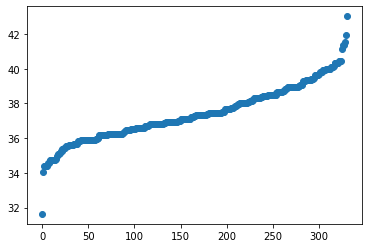

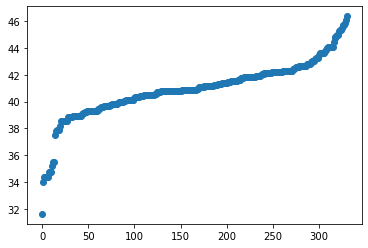

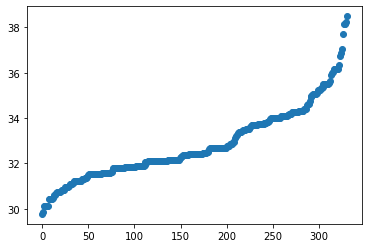

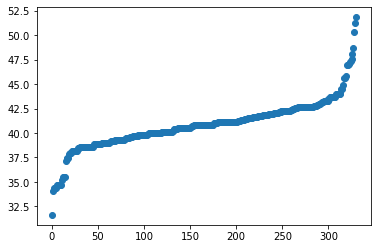

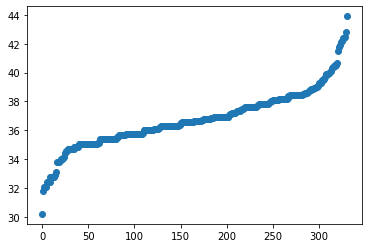

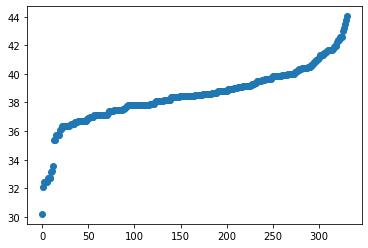

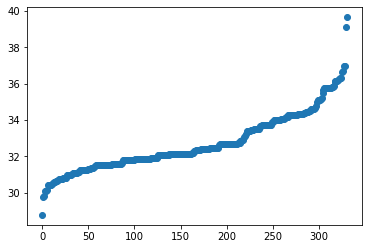

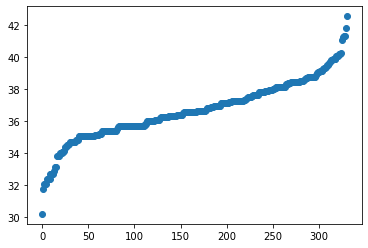

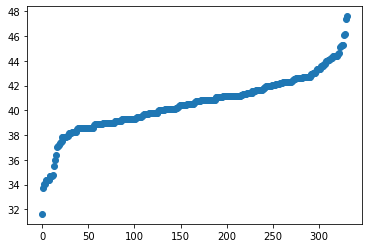

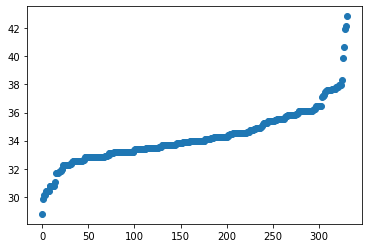

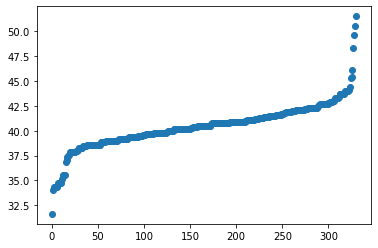

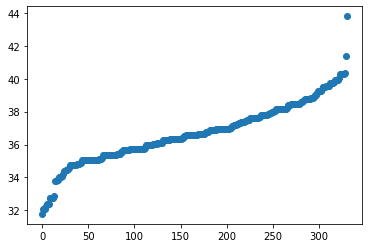

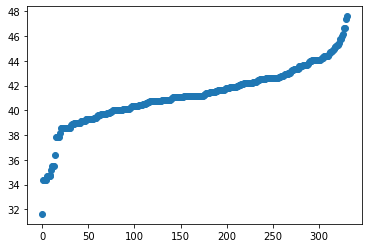

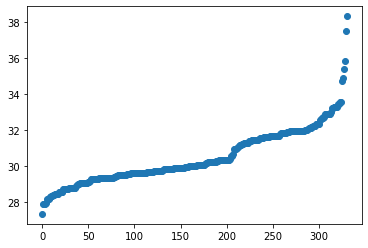

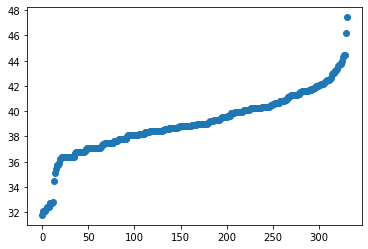

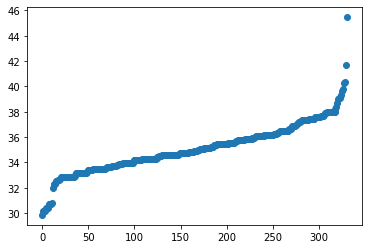

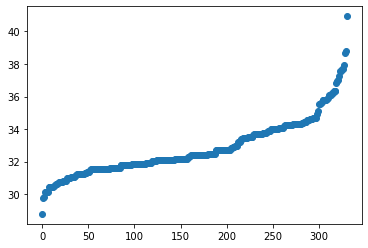

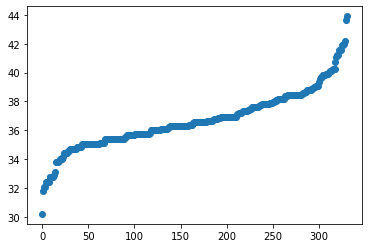

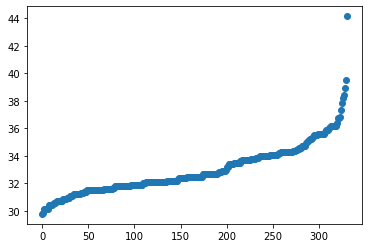

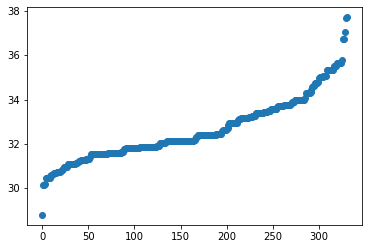

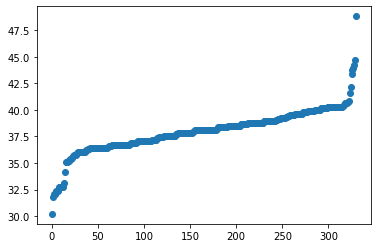

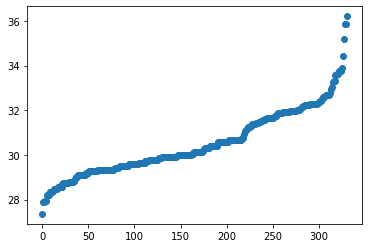

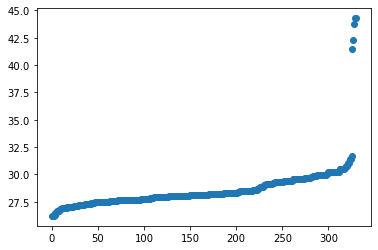

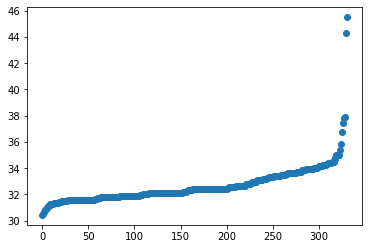

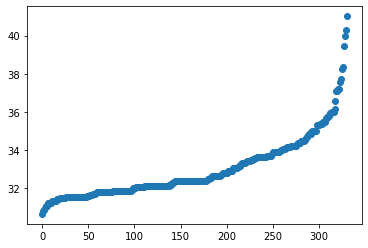

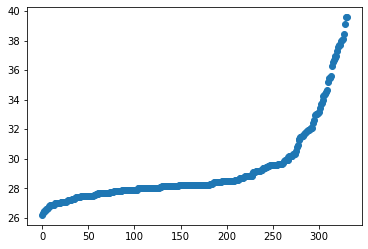

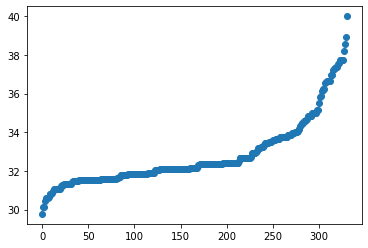

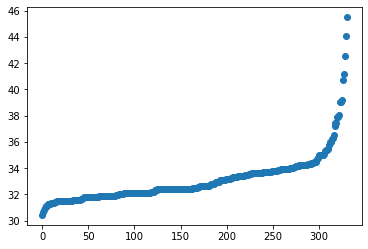

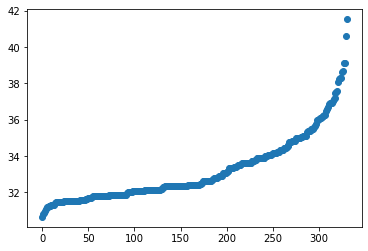

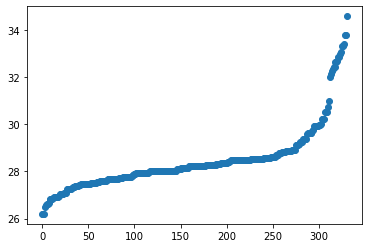

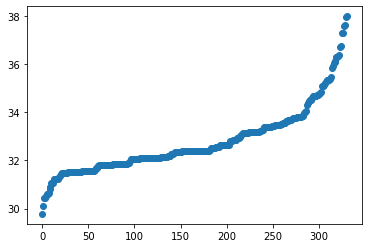

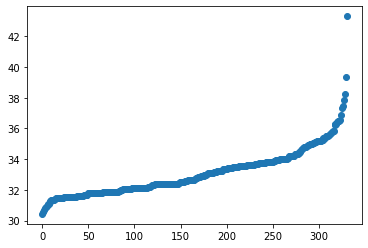

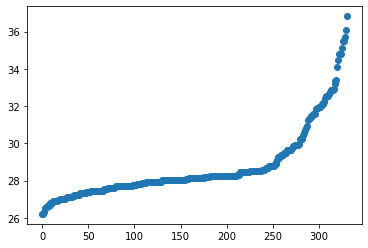

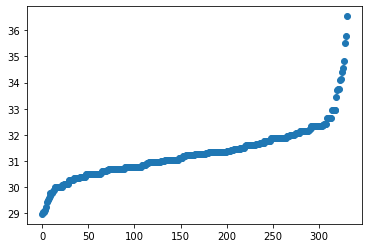

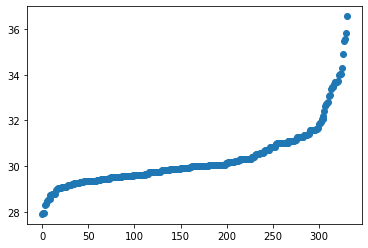

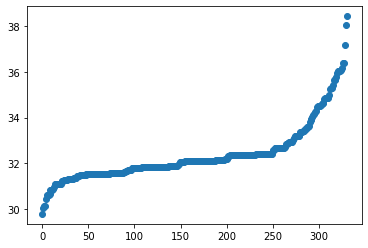

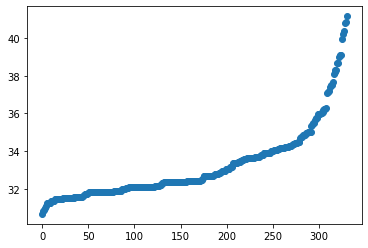

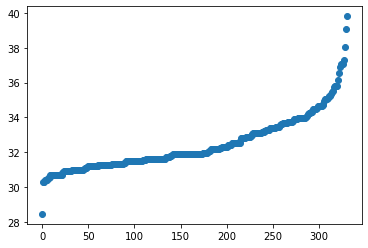

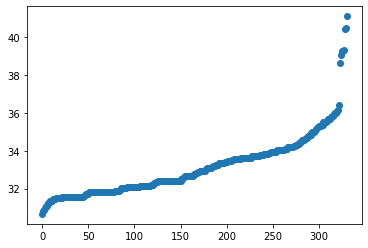

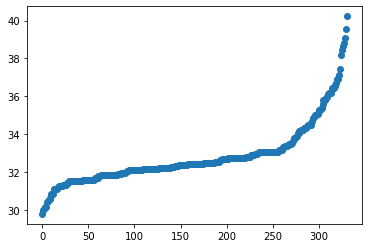

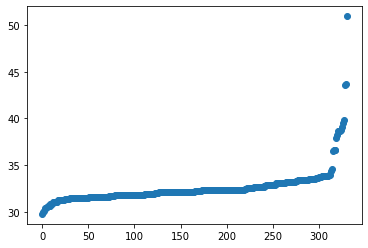

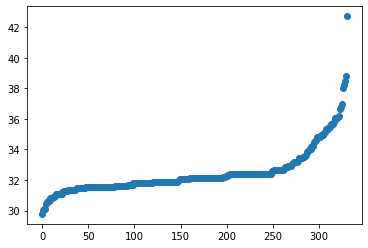

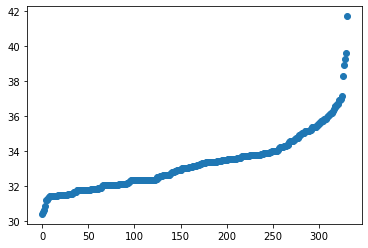

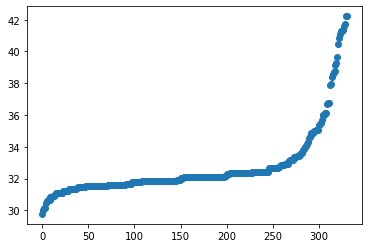

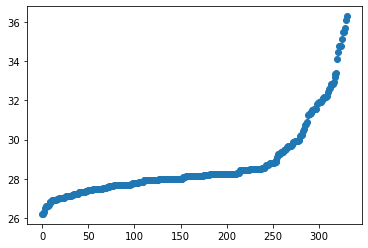

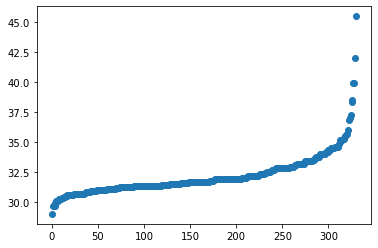

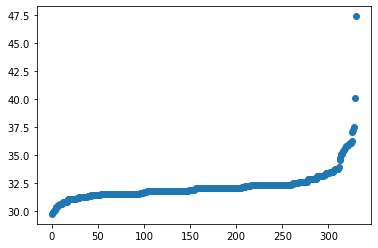

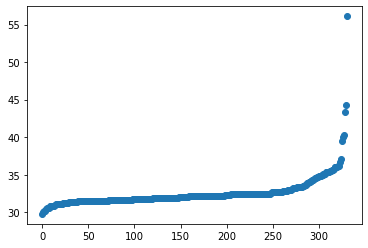

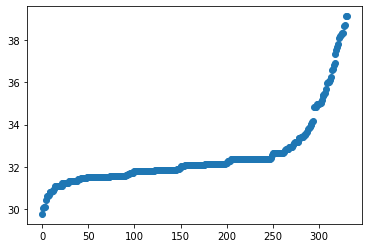

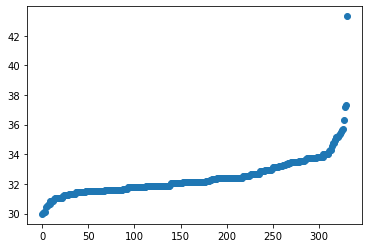

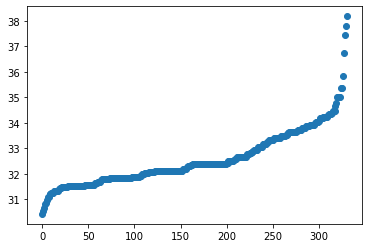

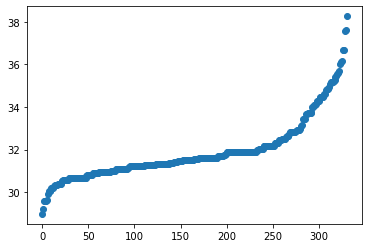

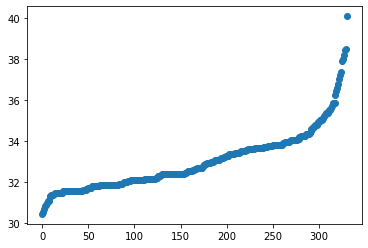

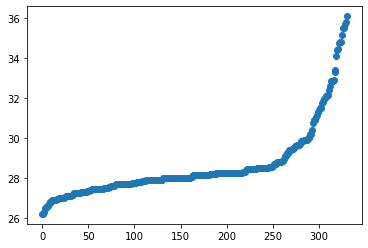

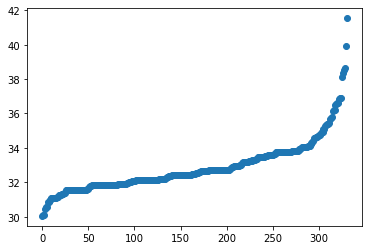

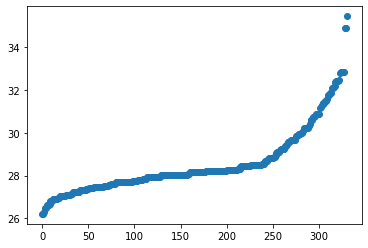

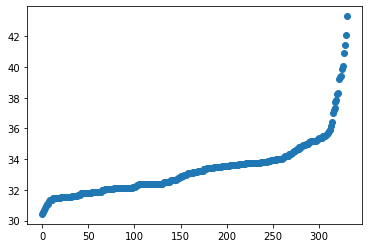

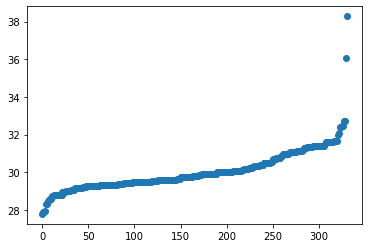

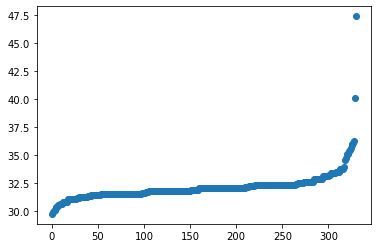

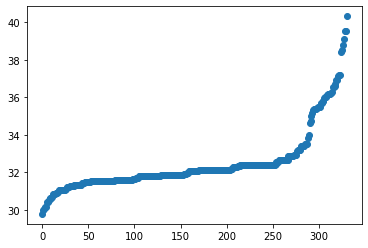

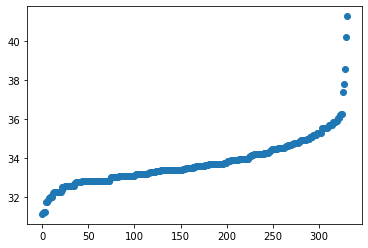

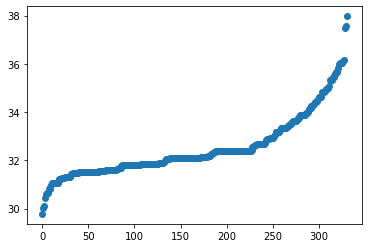

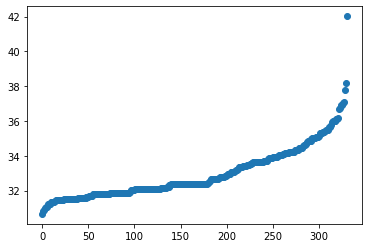

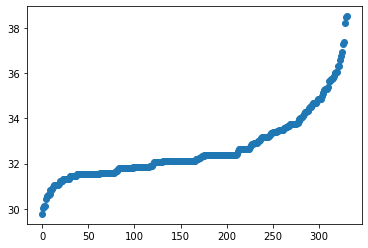

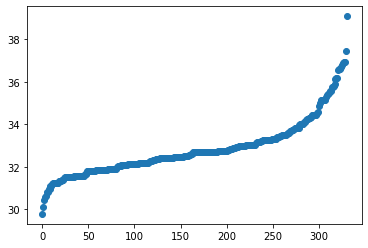

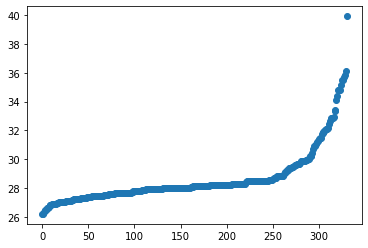

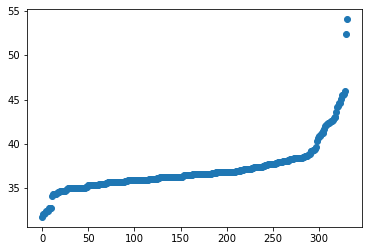

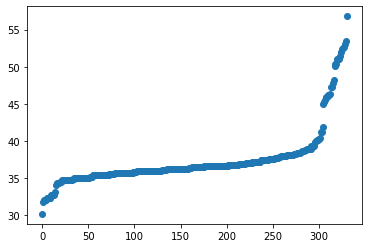

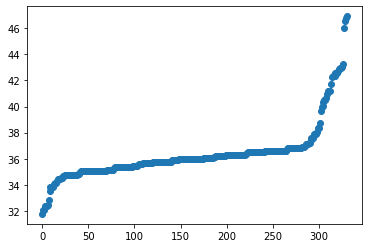

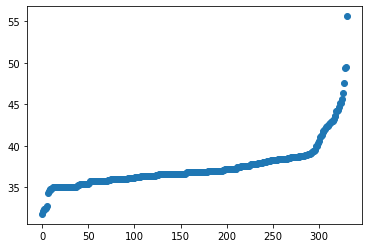

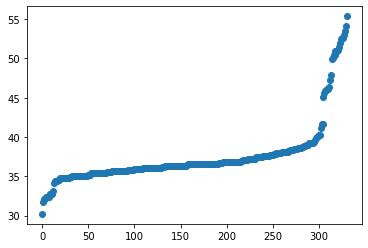

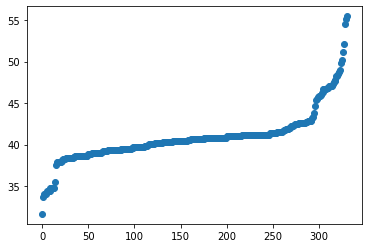

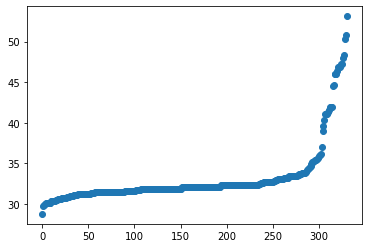

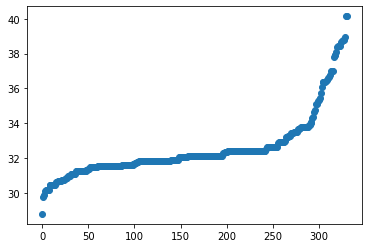

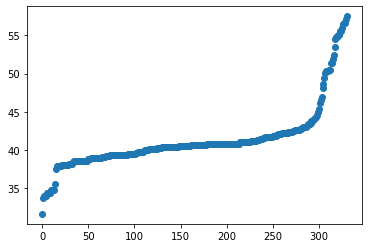

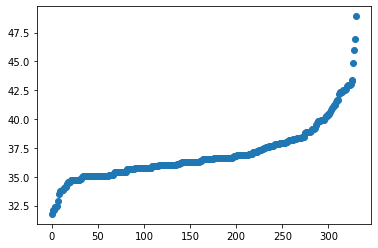

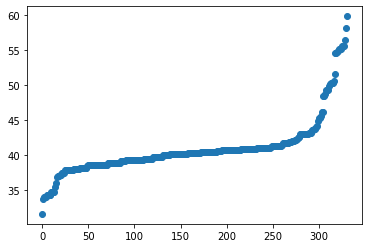

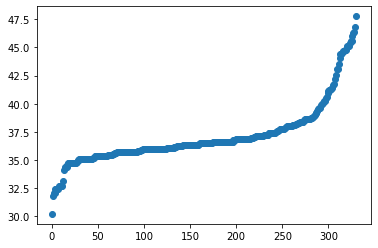

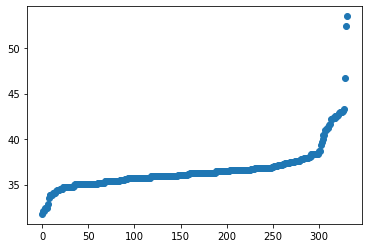

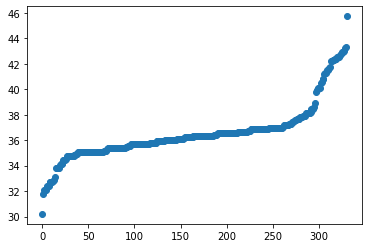

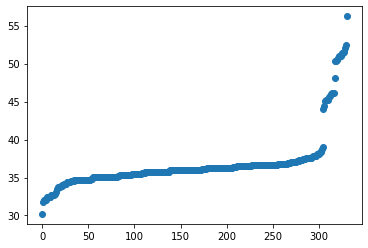

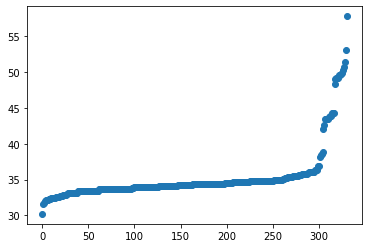

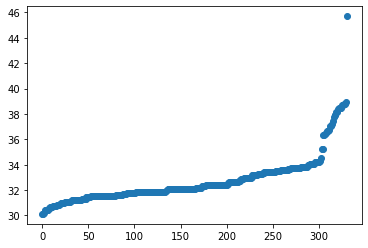

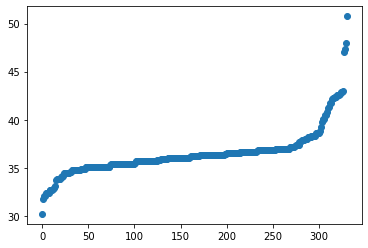

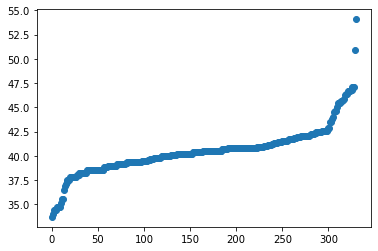

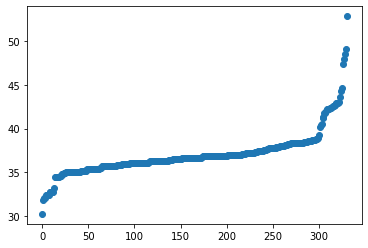

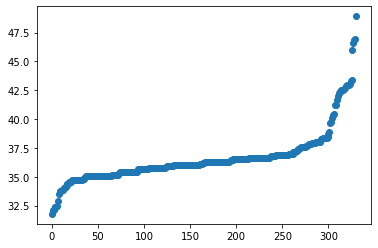

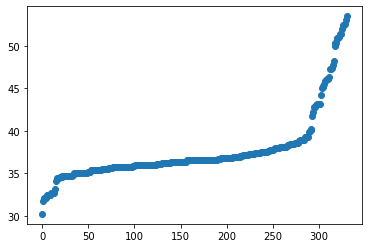

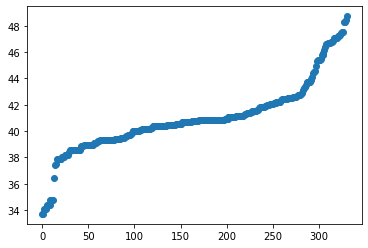

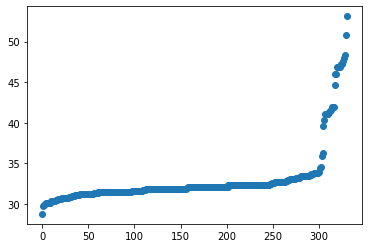

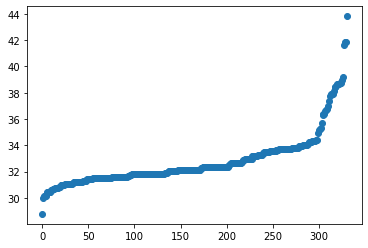

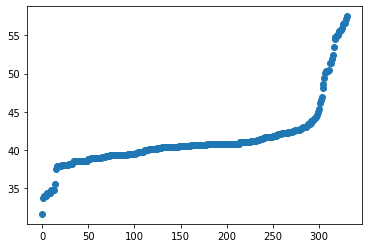

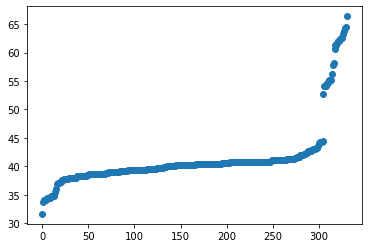

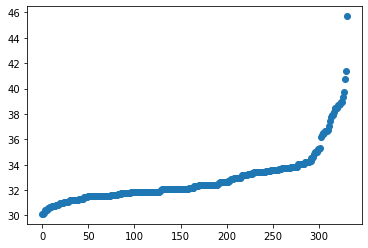

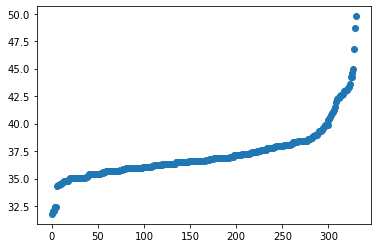

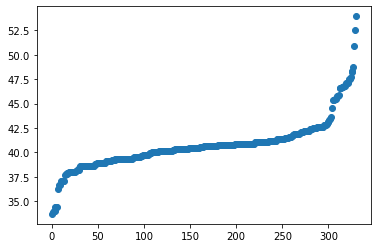

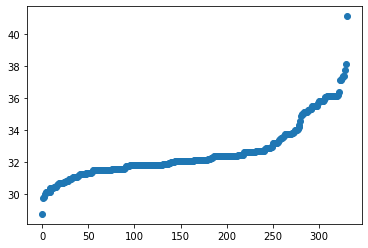

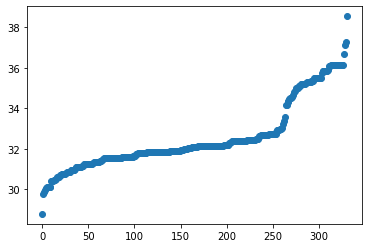

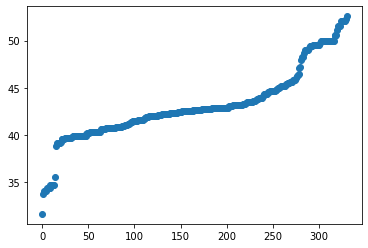

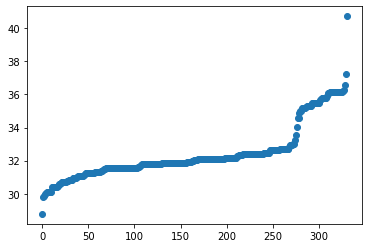

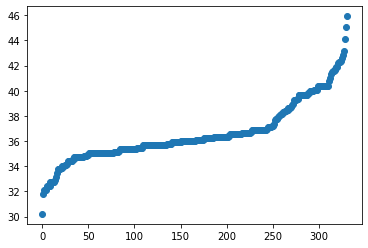

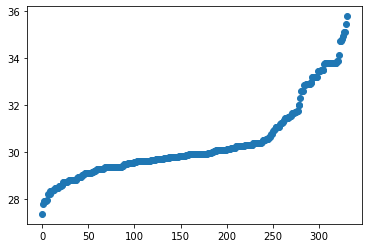

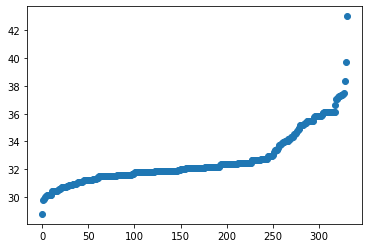

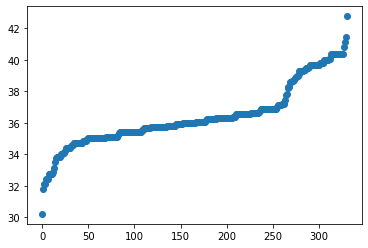

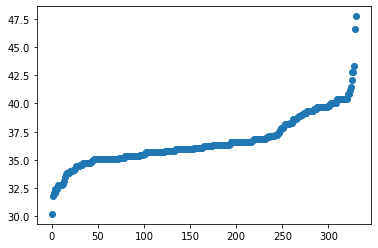

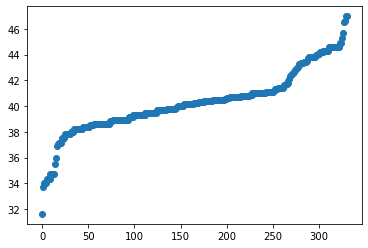

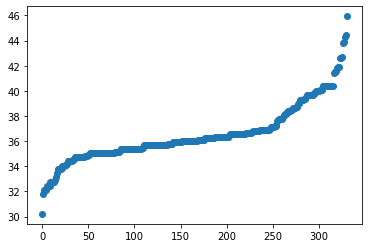

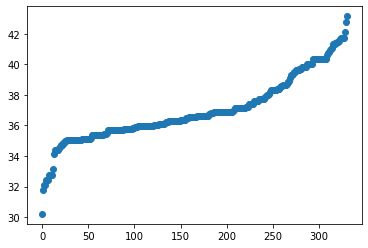

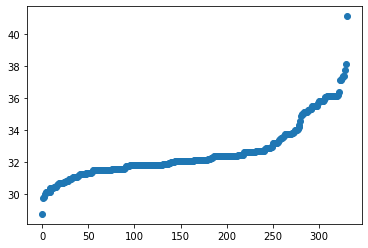

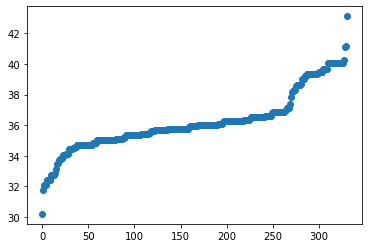

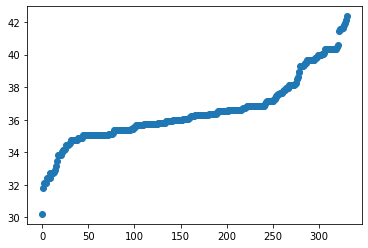

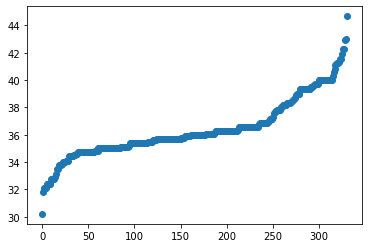

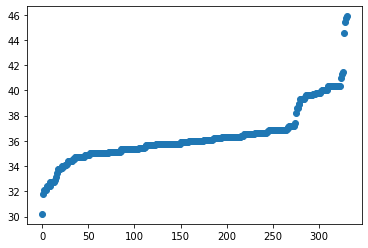

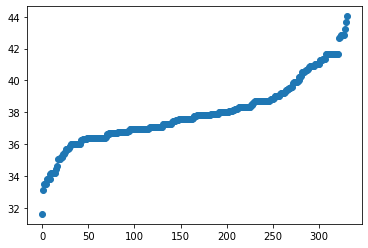

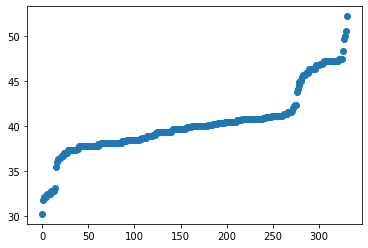

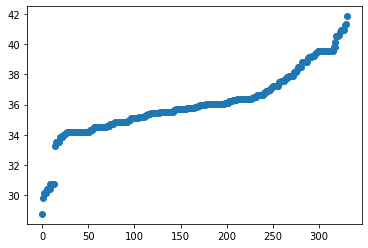

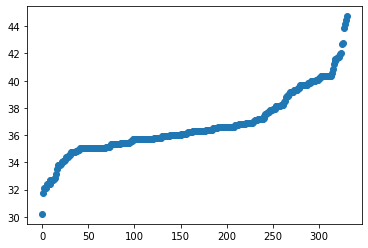

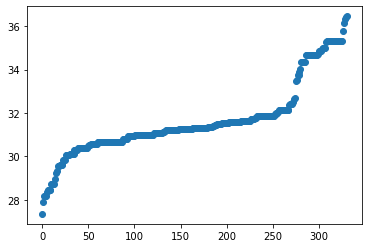

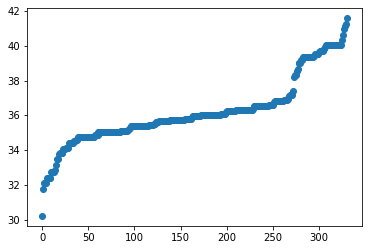

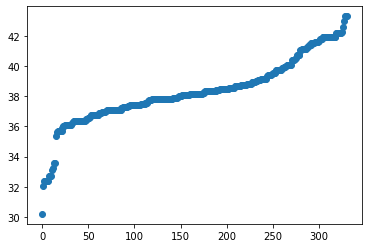

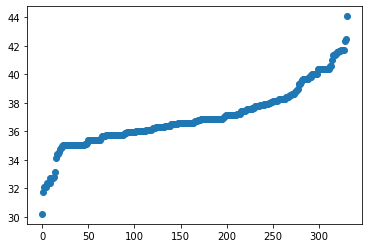

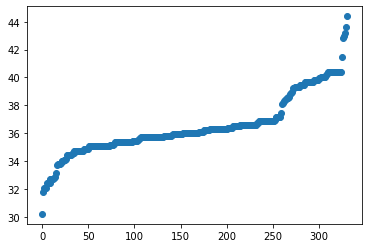

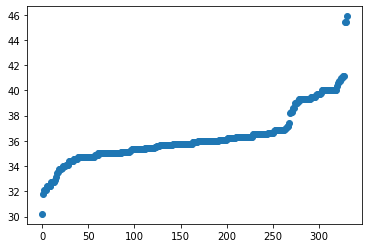

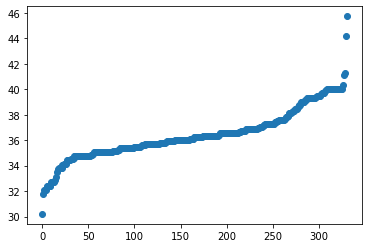

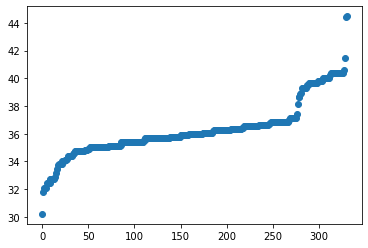

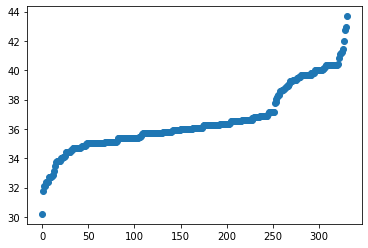

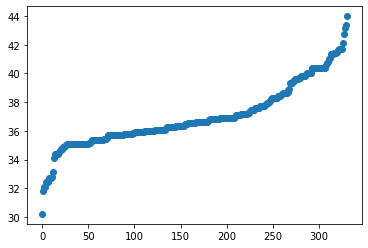

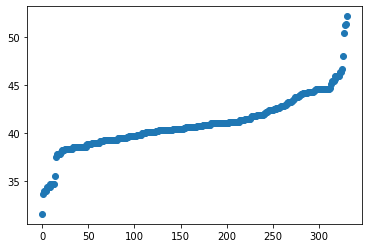

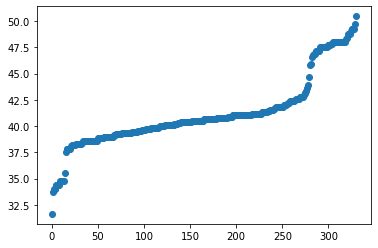

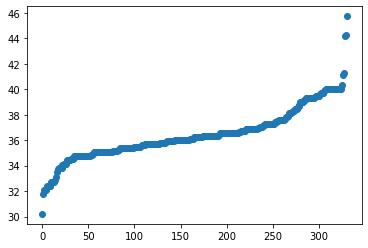

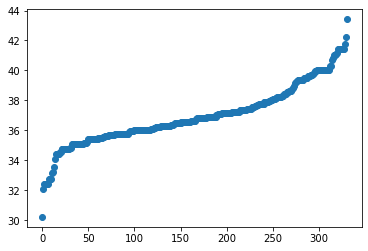

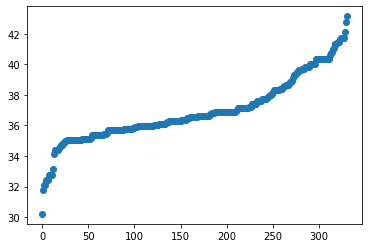

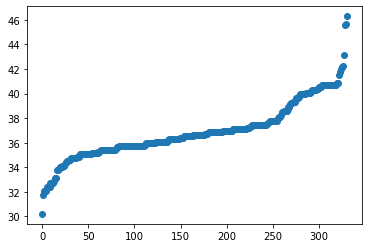

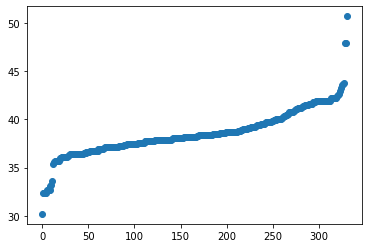

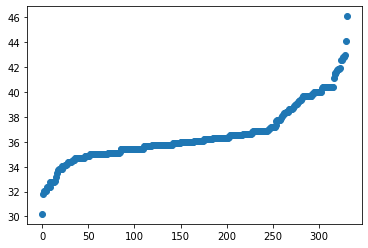

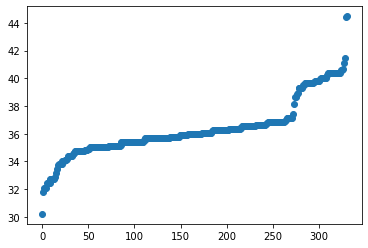

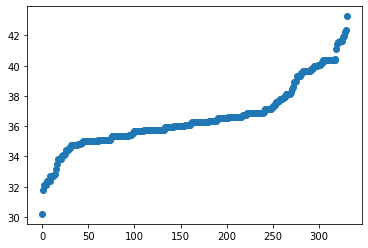

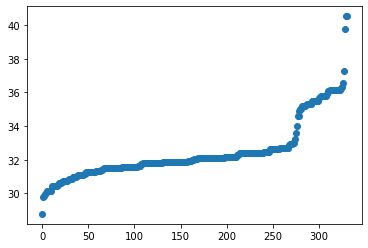

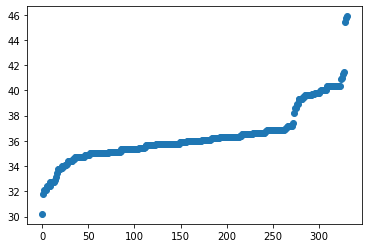

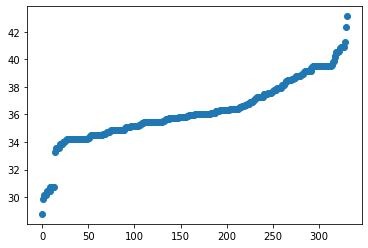

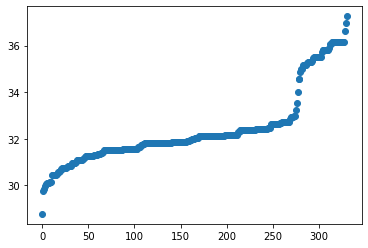

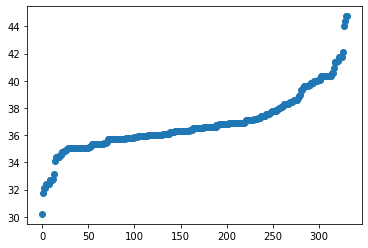

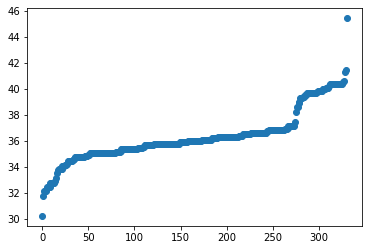

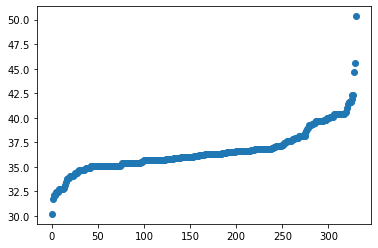

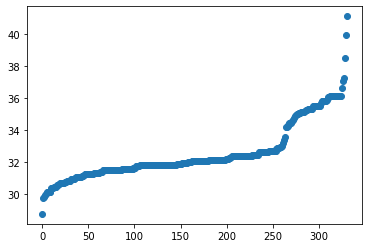

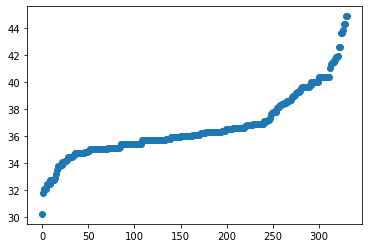

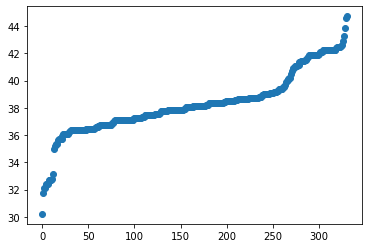

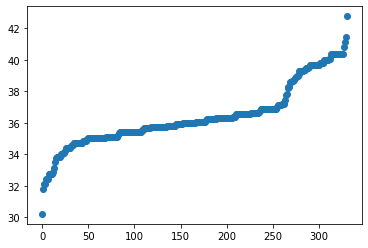

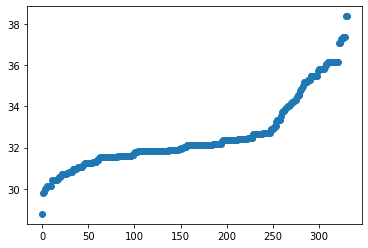

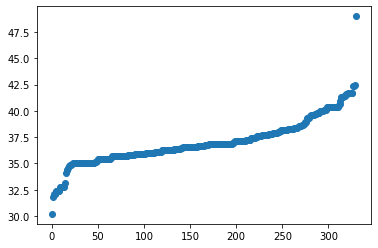

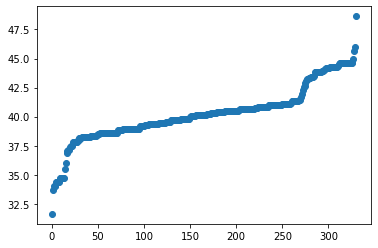

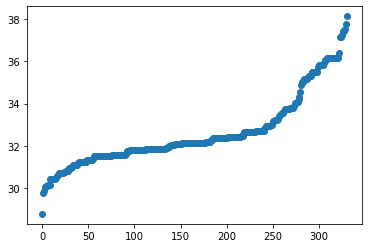

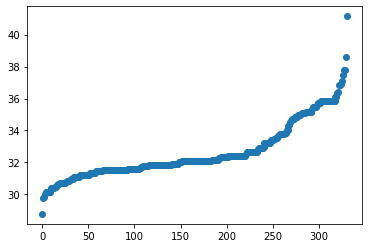

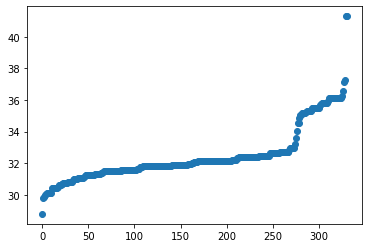

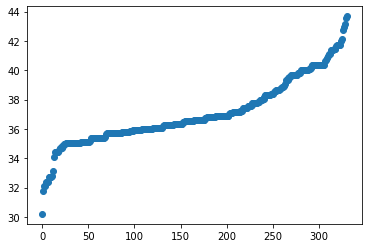

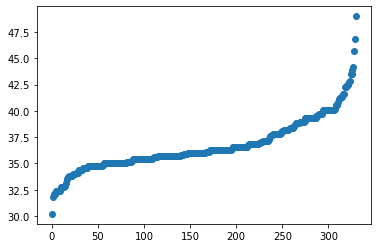

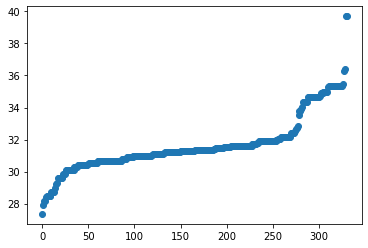

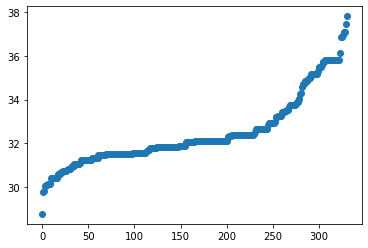

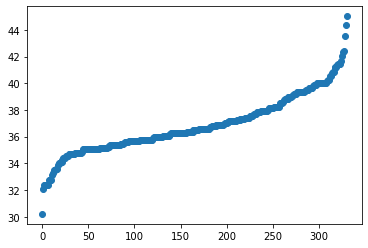

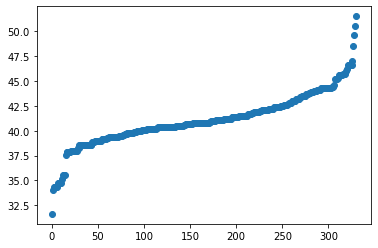

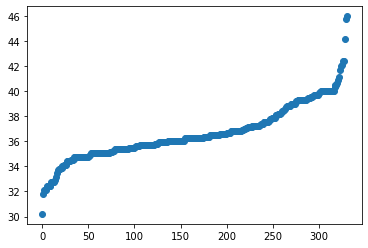

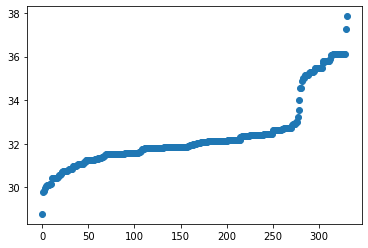

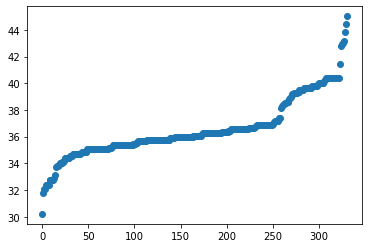

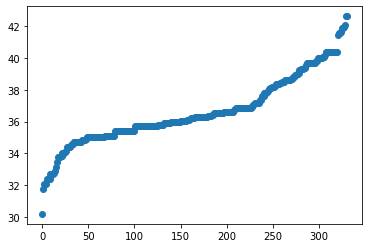

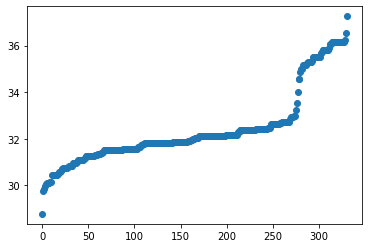

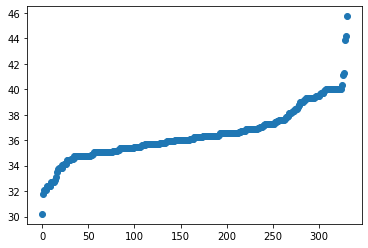

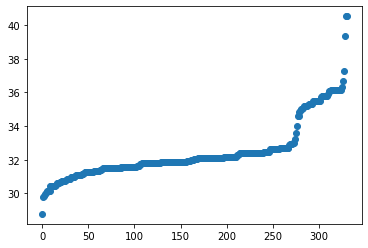

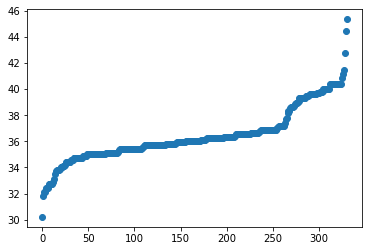

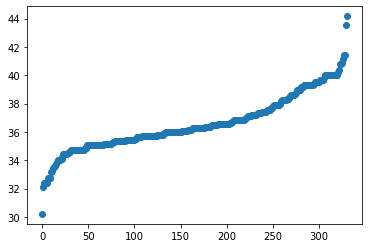

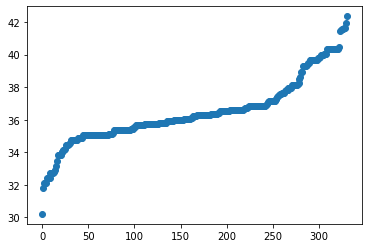

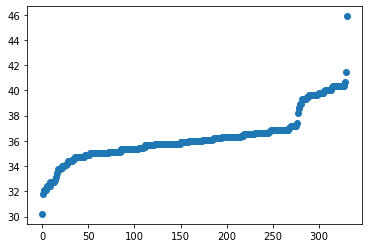

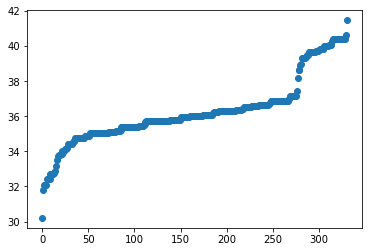

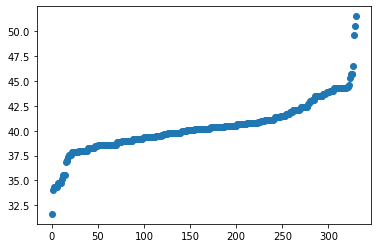

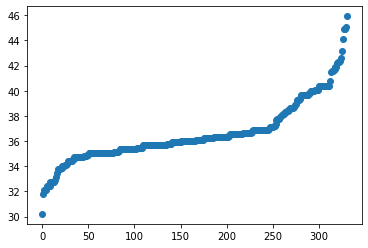

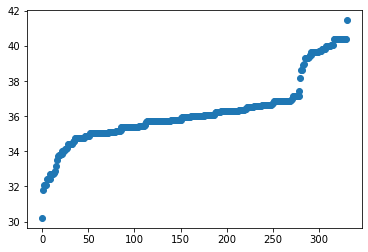

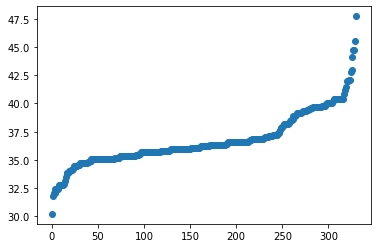

In [88]:
from matplotlib import pyplot as plt
for i in np.sort(thing):
    plt.figure()
    plt.plot(i,'o')

In [92]:
3*np.std(thing) + np.mean(thing)

46.47835926897562

In [102]:
left = pd.read_pickle(f'/lfs/1/sahaana/enrichment/data/dm_blocked/joined_fodors_zagat_exp_data/tableA_processed.pkl')
right = pd.read_pickle(f'/lfs/1/sahaana/enrichment/data/dm_blocked/joined_fodors_zagat_exp_data/tableB_processed.pkl')
supervision_train = pd.read_pickle(f'/lfs/1/sahaana/enrichment/data/dm_blocked/joined_fodors_zagat_exp_data/supervision_train.pkl').set_index('ltable_id')
supervision_test = pd.read_pickle(f'/lfs/1/sahaana/enrichment/data/dm_blocked/joined_fodors_zagat_exp_data/supervision_test.pkl').set_index('ltable_id')

In [105]:
supervision_train.loc[0]

rtable_id    [218]
Name: 0, dtype: object

In [108]:
left.loc[[0,0]]

name                         addr  \
id                                                                  
0   ` arnie morton \ 's of chicago '  ' 435 s. la cienega blv . '   
0   ` arnie morton \ 's of chicago '  ' 435 s. la cienega blv . '   

               city          phone      type  class  \
id                                                    
0   ` los angeles '  310/246 -1501  american      0   
0   ` los angeles '  310/246 -1501  american      0   

                                           merged_all  
id                                                     
0    [SEP]  name ` arnie morton \ 's of chicago ' ...  
0    [SEP]  name ` arnie morton \ 's of chicago ' ...

In [110]:
right.loc[[218,133]]

name                         addr  \
id                                                                           
218          ` arnie morton \ 's of chicago '  ' 435 s. la cienega blvd. '   
133  ` morton \ 's of chicago ( las vegas ) '  ' 3200 las vegas blvd. s. '   

                city         phone         type  class  \
id                                                       
218  ` los angeles '  310-246-1501  steakhouses      0   
133    ` las vegas '  702-893-0703  steakhouses    667   

                                            merged_all  
id                                                      
218   [SEP]  name ` arnie morton \ 's of chicago ' ...  
133   [SEP]  name ` morton \ 's of chicago ( las ve...